In [1]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

In [121]:
def k_distrib(graph=G, scale='lin', colour='#40a6d1', alpha=.8, expct_lo=1, expct_hi=10, expct_const=1):
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    # X-axis and y-axis values
    x = []
    y_tmp = []
    # loop for all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree+1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i/num_nodes for i in y_tmp]
    # Plot the graph
    deg, = plt.plot(x, y,label='Degree distribution',linewidth=0, marker='o',markersize=8, color=colour, alpha=alpha)
    # Check the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        # add theoretical distribution line k^-3
        w = [a for a in range(expct_lo,expct_hi)] 
        z = []
        for i in w:
            x = (i**-3) * expct_const
            z.append(x)
        
        plt.plot(w,z, 'k-', color='#7f7f7f')
    else:
        plt.title('Degree distribution (linear scale)')

        
    plt.ylabel('P(k)')
    plt.xlabel('k')    
    plt.show()

In [137]:
print("***\nWelcome to Barabási–Albert (BA) model simulation\nAuthor: Aleksander Molak (2017)\n!איזה כיף\n\n")

# Get parameters
init_nodes = int(input("Please type in the initial number of nodes (m_0): "))
final_nodes = int(input("\nPlease type in the final number of nodes: "))
m_parameter = int(input("\nPlease type in the value of m parameter (m<=m_0): "))

print("\n")
print("Creating initial graph...")

G = nx.complete_graph(init_nodes)

print("Graph created. Number of nodes: {}".format(len(G.nodes())))
print("Adding nodes...")

def rand_prob_node():
    nodes_probs = []
    for node in G.nodes():
        node_degr = G.degree(node)
        #print(node_degr)
        node_proba = node_degr / (2 * len(G.edges()))
        #print("Node proba is: {}".format(node_proba))
        nodes_probs.append(node_proba)
        #print("Nodes probablities: {}".format(nodes_probs))
    random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)
    #print("Randomly selected node is: {}".format(random_proba_node))
    return random_proba_node
        
def add_edge():
        if len(G.edges()) == 0:
            random_proba_node = 0
        else:
            random_proba_node = rand_prob_node()
        new_edge = (random_proba_node, new_node)
        if new_edge in G.edges():
            print("!ככה לא בונים חומה")
            add_edge()
        else:
            print("!מזל טוב")
            G.add_edge(new_node, random_proba_node)
            print("Edge added: {} {}".format(new_node + 1, random_proba_node))    
    
count = 0
new_node = init_nodes
    
for f in range(final_nodes - init_nodes):
    print("----------> Step {} <----------".format(count))
    G.add_node(init_nodes + count)
    print("Node added: {}".format(init_nodes + count + 1))
    count += 1
    for e in range(0, m_parameter):
        add_edge()
    new_node += 1

        
print("\nFinal number of nodes ({}) reached".format(len(G.nodes())))

print("\n\nThanks! !תודה רבה :)\n")


***
Welcome to Barabási–Albert (BA) model simulation
Author: Aleksander Molak (2017)
!איזה כיף


Please type in the initial number of nodes (m_0): 4

Please type in the final number of nodes: 500

Please type in the value of m parameter (m<=m_0): 2


Creating initial graph...
Graph created. Number of nodes: 4
Adding nodes...
----------> Step 0 ------------
Node added: 5
!מזל טוב
Edge added: 5 2
!מזל טוב
Edge added: 5 4
----------> Step 1 ------------
Node added: 6
!מזל טוב
Edge added: 6 1
!מזל טוב
Edge added: 6 0
----------> Step 2 ------------
Node added: 7
!מזל טוב
Edge added: 7 3
!מזל טוב
Edge added: 7 0
----------> Step 3 ------------
Node added: 8
!מזל טוב
Edge added: 8 6
!ככה לא בונים חומה
!מזל טוב
Edge added: 8 0
----------> Step 4 ------------
Node added: 9
!מזל טוב
Edge added: 9 0
!מזל טוב
Edge added: 9 6
----------> Step 5 ------------
Node added: 10
!מזל טוב
Edge added: 10 7
!מזל טוב
Edge added: 10 1
----------> Step 6 ------------
Node added: 11
!מזל טוב
Edge added: 11 8
!מ

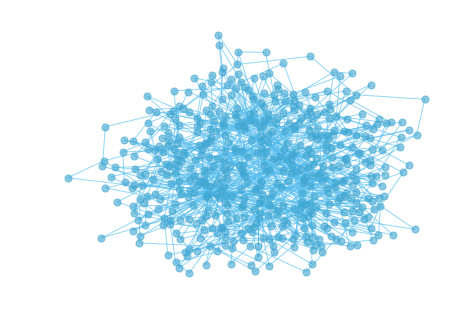

In [142]:
nx.draw(G, node_size=50, with_labels=0, alpha=0.6, node_color="#40a6d1", edge_color="#52bced")

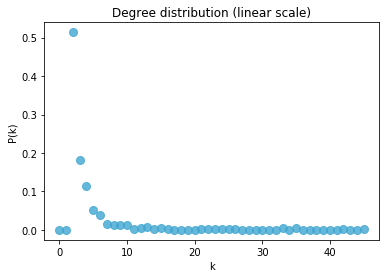

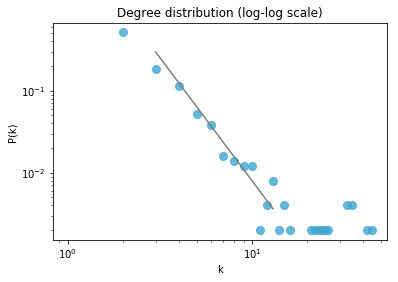

In [145]:
k_distrib(graph=G,colour='#40a6d1',alpha=.8)
k_distrib(graph=G,colour='#40a6d1', scale='log',alpha=.8, expct_lo=3, expct_hi=14, expct_const=8)

In [68]:
n1000 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]


In [69]:
e1000 = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 14), (0, 15), (0, 16), (0, 17), (0, 20), (0, 21), (0, 23), (0, 24), (0, 26), (0, 33), (0, 37), (0, 551), (0, 553), (0, 42), (0, 647), (0, 300), (0, 47), (0, 264), (0, 50), (0, 52), (0, 53), (0, 777), (0, 564), (0, 66), (0, 779), (0, 838), (0, 71), (0, 843), (0, 332), (0, 589), (0, 79), (0, 595), (0, 87), (0, 344), (0, 90), (0, 859), (0, 861), (0, 351), (0, 613), (0, 870), (0, 104), (0, 105), (0, 109), (0, 115), (0, 118), (0, 635), (0, 381), (0, 126), (0, 639), (0, 643), (0, 391), (0, 136), (0, 653), (0, 147), (0, 494), (0, 409), (0, 667), (0, 282), (0, 415), (0, 932), (0, 680), (0, 940), (0, 941), (0, 689), (0, 192), (0, 451), (0, 196), (0, 972), (0, 974), (0, 983), (0, 478), (0, 991), (0, 228), (0, 231), (0, 744), (0, 238), (0, 496), (0, 241), (0, 83), (0, 504), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 258), (1, 15), (1, 528), (1, 18), (1, 195), (1, 278), (1, 25), (1, 410), (1, 157), (1, 30), (1, 133), (1, 160), (1, 261), (1, 38), (1, 169), (1, 173), (1, 48), (1, 51), (1, 670), (1, 393), (1, 57), (1, 828), (1, 190), (1, 406), (1, 192), (1, 32), (1, 67), (1, 846), (1, 197), (1, 839), (1, 75), (1, 386), (1, 288), (1, 900), (1, 514), (1, 84), (1, 725), (1, 982), (1, 856), (1, 676), (1, 222), (1, 230), (1, 105), (1, 874), (1, 146), (1, 625), (1, 629), (1, 758), (1, 617), (1, 382), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 269), (2, 14), (2, 15), (2, 16), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 24), (2, 260), (2, 286), (2, 517), (2, 555), (2, 603), (2, 37), (2, 38), (2, 553), (2, 519), (2, 46), (2, 47), (2, 49), (2, 54), (2, 57), (2, 58), (2, 59), (2, 60), (2, 522), (2, 318), (2, 63), (2, 64), (2, 66), (2, 523), (2, 325), (2, 329), (2, 778), (2, 704), (2, 590), (2, 781), (2, 80), (2, 81), (2, 82), (2, 83), (2, 342), (2, 600), (2, 829), (2, 91), (2, 92), (2, 95), (2, 272), (2, 357), (2, 103), (2, 107), (2, 108), (2, 367), (2, 112), (2, 374), (2, 379), (2, 894), (2, 383), (2, 128), (2, 129), (2, 899), (2, 391), (2, 392), (2, 138), (2, 397), (2, 144), (2, 657), (2, 403), (2, 789), (2, 149), (2, 410), (2, 156), (2, 670), (2, 837), (2, 624), (2, 162), (2, 931), (2, 422), (2, 423), (2, 684), (2, 433), (2, 949), (2, 955), (2, 446), (2, 448), (2, 453), (2, 929), (2, 205), (2, 463), (2, 469), (2, 293), (2, 224), (2, 481), (2, 740), (2, 485), (2, 486), (2, 232), (2, 491), (2, 753), (2, 741), (2, 756), (2, 246), (2, 656), (2, 251), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (3, 17), (3, 914), (3, 916), (3, 951), (3, 23), (3, 576), (3, 27), (3, 28), (3, 286), (3, 773), (3, 32), (3, 33), (3, 34), (3, 163), (3, 815), (3, 295), (3, 297), (3, 42), (3, 45), (3, 430), (3, 687), (3, 385), (3, 305), (3, 692), (3, 694), (3, 265), (3, 440), (3, 953), (3, 58), (3, 833), (3, 192), (3, 65), (3, 452), (3, 453), (3, 471), (3, 545), (3, 586), (3, 331), (3, 470), (3, 87), (3, 228), (3, 871), (3, 365), (3, 496), (3, 250), (3, 379), (3, 893), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 17), (4, 274), (4, 787), (4, 789), (4, 535), (4, 281), (4, 27), (4, 28), (4, 541), (4, 768), (4, 31), (4, 32), (4, 944), (4, 35), (4, 36), (4, 295), (4, 40), (4, 43), (4, 257), (4, 301), (4, 46), (4, 47), (4, 520), (4, 972), (4, 435), (4, 52), (4, 821), (4, 265), (4, 308), (4, 58), (4, 556), (4, 317), (4, 574), (4, 319), (4, 320), (4, 65), (4, 324), (4, 69), (4, 718), (4, 71), (4, 258), (4, 75), (4, 333), (4, 78), (4, 79), (4, 336), (4, 82), (4, 84), (4, 85), (4, 342), (4, 856), (4, 314), (4, 97), (4, 355), (4, 360), (4, 362), (4, 111), (4, 660), (4, 372), (4, 552), (4, 888), (4, 121), (4, 380), (4, 125), (4, 895), (4, 132), (4, 389), (4, 207), (4, 137), (4, 521), (4, 144), (4, 146), (4, 707), (4, 404), (4, 405), (4, 662), (4, 25), (4, 68), (4, 155), (4, 925), (4, 416), (4, 165), (4, 934), (4, 168), (4, 937), (4, 480), (4, 171), (4, 517), (4, 175), (4, 266), (4, 177), (4, 179), (4, 437), (4, 950), (4, 951), (4, 953), (4, 475), (4, 451), (4, 198), (4, 199), (4, 201), (4, 204), (4, 462), (4, 77), (4, 208), (4, 433), (4, 213), (4, 215), (4, 730), (4, 219), (4, 220), (4, 221), (4, 731), (4, 224), (4, 738), (4, 570), (4, 484), (4, 997), (4, 233), (4, 826), (4, 239), (4, 240), (4, 497), (4, 754), (4, 503), (4, 852), (4, 596), (4, 511), (4, 508), (4, 682), (4, 254), (4, 341), (5, 133), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 140), (5, 13), (5, 14), (5, 15), (5, 272), (5, 531), (5, 404), (5, 151), (5, 781), (5, 29), (5, 414), (5, 709), (5, 237), (5, 417), (5, 546), (5, 419), (5, 164), (5, 134), (5, 423), (5, 40), (5, 604), (5, 42), (5, 135), (5, 172), (5, 45), (5, 925), (5, 48), (5, 136), (5, 51), (5, 437), (5, 310), (5, 55), (5, 825), (5, 351), (5, 830), (5, 959), (5, 799), (5, 451), (5, 643), (5, 70), (5, 256), (5, 456), (5, 845), (5, 397), (5, 208), (5, 211), (5, 469), (5, 215), (5, 798), (5, 36), (5, 348), (5, 349), (5, 734), (5, 37), (5, 608), (5, 99), (5, 100), (5, 485), (5, 358), (5, 109), (5, 238), (5, 694), (5, 368), (5, 552), (5, 498), (5, 787), (5, 372), (5, 504), (5, 673), (5, 813), (5, 891), (5, 126), (6, 51), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 15), (6, 276), (6, 277), (6, 22), (6, 535), (6, 280), (6, 772), (6, 539), (6, 28), (6, 29), (6, 542), (6, 31), (6, 291), (6, 549), (6, 41), (6, 42), (6, 43), (6, 300), (6, 45), (6, 827), (6, 49), (6, 563), (6, 821), (6, 265), (6, 312), (6, 571), (6, 266), (6, 831), (6, 320), (6, 522), (6, 835), (6, 325), (6, 326), (6, 74), (6, 55), (6, 76), (6, 610), (6, 592), (6, 81), (6, 867), (6, 598), (6, 859), (6, 94), (6, 96), (6, 98), (6, 611), (6, 870), (6, 361), (6, 363), (6, 620), (6, 118), (6, 376), (6, 378), (6, 382), (6, 917), (6, 386), (6, 619), (6, 389), (6, 136), (6, 66), (6, 910), (6, 149), (6, 919), (6, 664), (6, 153), (6, 156), (6, 413), (6, 414), (6, 159), (6, 412), (6, 175), (6, 176), (6, 177), (6, 181), (6, 799), (6, 701), (6, 587), (6, 197), (6, 967), (6, 712), (6, 203), (6, 461), (6, 208), (6, 211), (6, 212), (6, 216), (6, 336), (6, 764), (6, 246), (6, 248), (6, 255), (6, 252), (6, 253), (6, 511), (7, 641), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 530), (7, 19), (7, 21), (7, 22), (7, 279), (7, 24), (7, 25), (7, 29), (7, 31), (7, 544), (7, 802), (7, 35), (7, 39), (7, 41), (7, 299), (7, 557), (7, 46), (7, 776), (7, 50), (7, 563), (7, 53), (7, 822), (7, 982), (7, 63), (7, 68), (7, 325), (7, 845), (7, 334), (7, 81), (7, 338), (7, 227), (7, 84), (7, 853), (7, 86), (7, 601), (7, 347), (7, 348), (7, 95), (7, 887), (7, 97), (7, 98), (7, 99), (7, 100), (7, 613), (7, 614), (7, 106), (7, 620), (7, 512), (7, 369), (7, 374), (7, 631), (7, 575), (7, 122), (7, 319), (7, 380), (7, 125), (7, 385), (7, 644), (7, 903), (7, 392), (7, 652), (7, 142), (7, 144), (7, 408), (7, 149), (7, 150), (7, 152), (7, 367), (7, 414), (7, 673), (7, 674), (7, 424), (7, 171), (7, 541), (7, 879), (7, 689), (7, 158), (7, 183), (7, 958), (7, 705), (7, 961), (7, 965), (7, 710), (7, 893), (7, 969), (7, 859), (7, 203), (7, 204), (7, 811), (7, 464), (7, 210), (7, 467), (7, 470), (7, 473), (7, 988), (7, 989), (7, 738), (7, 483), (7, 742), (7, 551), (7, 492), (7, 495), (7, 752), (7, 339), (7, 244), (7, 246), (7, 340), (8, 264), (8, 9), (8, 10), (8, 11), (8, 12), (8, 14), (8, 784), (8, 17), (8, 788), (8, 23), (8, 545), (8, 36), (8, 262), (8, 296), (8, 41), (8, 811), (8, 812), (8, 301), (8, 559), (8, 885), (8, 565), (8, 566), (8, 692), (8, 752), (8, 63), (8, 64), (8, 65), (8, 66), (8, 71), (8, 73), (8, 74), (8, 76), (8, 590), (8, 850), (8, 86), (8, 599), (8, 857), (8, 602), (8, 604), (8, 93), (8, 97), (8, 102), (8, 273), (8, 617), (8, 108), (8, 701), (8, 624), (8, 113), (8, 373), (8, 888), (8, 635), (8, 127), (8, 473), (8, 387), (8, 833), (8, 904), (8, 142), (8, 917), (8, 407), (8, 111), (8, 161), (8, 163), (8, 164), (8, 173), (8, 686), (8, 180), (8, 953), (8, 954), (8, 444), (8, 202), (8, 191), (8, 964), (8, 457), (8, 458), (8, 971), (8, 460), (8, 844), (8, 210), (8, 675), (8, 974), (8, 215), (8, 729), (8, 992), (8, 994), (8, 230), (8, 519), (8, 748), (8, 493), (8, 775), (8, 247), (8, 506), (8, 765), (9, 44), (9, 10), (9, 11), (9, 16), (9, 18), (9, 19), (9, 20), (9, 21), (9, 534), (9, 516), (9, 26), (9, 796), (9, 30), (9, 31), (9, 289), (9, 34), (9, 35), (9, 262), (9, 294), (9, 296), (9, 810), (9, 263), (9, 257), (9, 776), (9, 691), (9, 308), (9, 566), (9, 567), (9, 624), (9, 58), (9, 60), (9, 61), (9, 68), (9, 69), (9, 326), (9, 329), (9, 76), (9, 77), (9, 80), (9, 84), (9, 345), (9, 314), (9, 95), (9, 97), (9, 354), (9, 100), (9, 101), (9, 105), (9, 112), (9, 582), (9, 531), (9, 628), (9, 885), (9, 119), (9, 276), (9, 635), (9, 381), (9, 638), (9, 277), (9, 384), (9, 130), (9, 133), (9, 143), (9, 286), (9, 627), (9, 153), (9, 538), (9, 417), (9, 977), (9, 165), (9, 678), (9, 679), (9, 936), (9, 170), (9, 517), (9, 176), (9, 177), (9, 179), (9, 181), (9, 186), (9, 700), (9, 191), (9, 960), (9, 450), (9, 198), (9, 844), (9, 970), (9, 717), (9, 333), (9, 208), (9, 465), (9, 210), (9, 979), (9, 213), (9, 214), (9, 471), (9, 975), (9, 221), (9, 734), (9, 991), (9, 228), (9, 550), (9, 231), (9, 489), (9, 852), (9, 596), (9, 895), (9, 510), (10, 128), (10, 11), (10, 889), (10, 13), (10, 16), (10, 17), (10, 18), (10, 275), (10, 148), (10, 789), (10, 23), (10, 25), (10, 282), (10, 29), (10, 30), (10, 773), (10, 560), (10, 162), (10, 292), (10, 39), (10, 40), (10, 554), (10, 43), (10, 812), (10, 285), (10, 432), (10, 818), (10, 503), (10, 854), (10, 309), (10, 54), (10, 56), (10, 697), (10, 698), (10, 701), (10, 703), (10, 192), (10, 193), (10, 834), (10, 963), (10, 950), (10, 582), (10, 893), (10, 968), (10, 331), (10, 663), (10, 77), (10, 727), (10, 461), (10, 568), (10, 514), (10, 819), (10, 821), (10, 86), (10, 471), (10, 949), (10, 90), (10, 221), (10, 735), (10, 784), (10, 489), (10, 233), (10, 106), (10, 786), (10, 110), (10, 765), (10, 787), (10, 766), (10, 247), (10, 377), (10, 634), (10, 379), (10, 362), (10, 382), (10, 767), (11, 793), (11, 13), (11, 782), (11, 145), (11, 274), (11, 387), (11, 20), (11, 601), (11, 152), (11, 132), (11, 413), (11, 799), (11, 675), (11, 646), (11, 38), (11, 257), (11, 44), (11, 176), (11, 305), (11, 388), (11, 186), (11, 316), (11, 317), (11, 446), (11, 65), (11, 193), (11, 328), (11, 588), (11, 204), (11, 744), (11, 718), (11, 464), (11, 120), (11, 211), (11, 343), (11, 344), (11, 217), (11, 475), (11, 732), (11, 677), (11, 976), (11, 100), (11, 998), (11, 536), (11, 488), (11, 233), (11, 109), (11, 623), (11, 705), (11, 114), (11, 830), (11, 489), (11, 248), (11, 889), (11, 891), (12, 256), (12, 19), (12, 22), (12, 23), (12, 24), (12, 26), (12, 31), (12, 544), (12, 48), (12, 37), (12, 294), (12, 39), (12, 40), (12, 43), (12, 44), (12, 816), (12, 305), (12, 50), (12, 308), (12, 313), (12, 321), (12, 66), (12, 67), (12, 583), (12, 329), (12, 587), (12, 78), (12, 85), (12, 87), (12, 88), (12, 346), (12, 92), (12, 131), (12, 618), (12, 107), (12, 108), (12, 402), (12, 111), (12, 113), (12, 275), (12, 885), (12, 374), (12, 375), (12, 377), (12, 122), (12, 635), (12, 124), (12, 387), (12, 389), (12, 134), (12, 535), (12, 655), (12, 401), (12, 658), (12, 579), (12, 917), (12, 151), (12, 409), (12, 154), (12, 162), (12, 931), (12, 164), (12, 171), (12, 174), (12, 433), (12, 445), (12, 448), (12, 194), (12, 711), (12, 202), (12, 119), (12, 722), (12, 980), (12, 733), (12, 991), (12, 737), (12, 741), (12, 487), (12, 210), (12, 241), (12, 341), (13, 279), (13, 640), (13, 259), (13, 73), (13, 396), (13, 655), (13, 144), (13, 855), (13, 99), (13, 150), (13, 25), (13, 24), (13, 217), (13, 282), (13, 91), (13, 997), (13, 16), (13, 418), (13, 35), (13, 356), (13, 933), (13, 649), (13, 41), (13, 225), (13, 777), (13, 877), (13, 238), (13, 61), (13, 752), (13, 497), (13, 19), (13, 564), (13, 631), (13, 121), (13, 58), (13, 125), (14, 328), (14, 513), (14, 72), (14, 329), (14, 75), (14, 460), (14, 194), (14, 334), (14, 399), (14, 467), (14, 480), (14, 22), (14, 791), (14, 89), (14, 26), (14, 155), (14, 156), (14, 777), (14, 94), (14, 288), (14, 304), (14, 356), (14, 229), (14, 783), (14, 470), (14, 672), (14, 598), (14, 112), (14, 50), (14, 372), (14, 577), (14, 55), (14, 120), (14, 124), (14, 183), (14, 318), (14, 447), (15, 898), (15, 265), (15, 675), (15, 268), (15, 130), (15, 654), (15, 18), (15, 147), (15, 739), (15, 277), (15, 151), (15, 26), (15, 283), (15, 606), (15, 30), (15, 287), (15, 33), (15, 546), (15, 667), (15, 167), (15, 924), (15, 299), (15, 301), (15, 432), (15, 328), (15, 52), (15, 181), (15, 713), (15, 698), (15, 159), (15, 190), (15, 321), (15, 196), (15, 72), (15, 585), (15, 77), (15, 79), (15, 848), (15, 465), (15, 817), (15, 99), (15, 86), (15, 215), (15, 600), (15, 605), (15, 350), (15, 227), (15, 229), (15, 616), (15, 489), (15, 106), (15, 146), (15, 110), (15, 882), (15, 755), (15, 500), (15, 830), (15, 745), (15, 251), (15, 200), (15, 874), (16, 835), (16, 70), (16, 269), (16, 963), (16, 406), (16, 655), (16, 157), (16, 542), (16, 32), (16, 34), (16, 739), (16, 230), (16, 239), (16, 306), (16, 349), (16, 59), (16, 125), (16, 62), (17, 322), (17, 837), (17, 198), (17, 545), (17, 841), (17, 75), (17, 418), (17, 82), (17, 83), (17, 536), (17, 153), (17, 411), (17, 378), (17, 607), (17, 33), (17, 34), (17, 163), (17, 745), (17, 234), (17, 107), (17, 434), (17, 814), (17, 136), (17, 242), (17, 307), (17, 372), (17, 56), (17, 314), (17, 738), (18, 64), (18, 69), (18, 385), (18, 72), (18, 128), (18, 843), (18, 194), (18, 472), (18, 83), (18, 88), (18, 591), (18, 898), (18, 713), (18, 236), (18, 556), (18, 47), (18, 689), (18, 851), (18, 138), (18, 55), (18, 312), (18, 825), (18, 330), (18, 382), (18, 319), (19, 387), (19, 650), (19, 267), (19, 270), (19, 975), (19, 20), (19, 533), (19, 411), (19, 540), (19, 250), (19, 350), (19, 944), (19, 475), (19, 101), (19, 168), (19, 426), (19, 199), (19, 44), (19, 340), (19, 175), (19, 304), (19, 578), (19, 562), (19, 820), (19, 53), (19, 310), (19, 364), (19, 122), (19, 661), (20, 512), (20, 132), (20, 831), (20, 258), (20, 911), (20, 21), (20, 665), (20, 751), (20, 28), (20, 158), (20, 160), (20, 290), (20, 35), (20, 429), (20, 46), (20, 236), (20, 54), (20, 311), (20, 56), (20, 442), (20, 189), (20, 53), (20, 320), (20, 480), (20, 323), (20, 197), (20, 951), (20, 337), (20, 163), (20, 854), (20, 856), (20, 473), (20, 732), (20, 93), (20, 96), (20, 737), (20, 614), (20, 102), (20, 106), (20, 107), (20, 620), (20, 621), (20, 61), (20, 883), (20, 117), (20, 760), (20, 835), (20, 63), (20, 894), (20, 639), (21, 138), (21, 34), (21, 206), (21, 666), (21, 27), (21, 92), (21, 157), (21, 992), (21, 226), (21, 355), (21, 740), (21, 103), (21, 941), (21, 302), (21, 623), (21, 880), (21, 691), (21, 699), (21, 507), (21, 511), (22, 897), (22, 584), (22, 589), (22, 527), (22, 465), (22, 803), (22, 596), (22, 661), (22, 662), (22, 663), (22, 89), (22, 154), (22, 922), (22, 161), (22, 418), (22, 291), (22, 548), (22, 101), (22, 455), (22, 306), (22, 237), (22, 46), (22, 49), (22, 370), (22, 947), (22, 120), (22, 313), (22, 123), (22, 980), (22, 443), (23, 385), (23, 263), (23, 526), (23, 941), (23, 146), (23, 534), (23, 410), (23, 27), (23, 796), (23, 416), (23, 33), (23, 165), (23, 426), (23, 43), (23, 173), (23, 306), (23, 54), (23, 823), (23, 958), (23, 897), (23, 32), (23, 322), (23, 454), (23, 289), (23, 968), (23, 910), (23, 335), (23, 337), (23, 483), (23, 340), (23, 85), (23, 218), (23, 732), (23, 805), (23, 608), (23, 355), (23, 484), (23, 869), (23, 102), (23, 103), (23, 892), (23, 362), (23, 875), (23, 365), (23, 110), (23, 111), (23, 880), (23, 498), (23, 383), (23, 884), (23, 632), (23, 123), (23, 507), (23, 510), (23, 469), (24, 641), (24, 648), (24, 938), (24, 791), (24, 536), (24, 538), (24, 539), (24, 932), (24, 37), (24, 294), (24, 168), (24, 297), (24, 42), (24, 135), (24, 175), (24, 49), (24, 307), (24, 682), (24, 54), (24, 969), (24, 36), (24, 68), (24, 72), (24, 73), (24, 591), (24, 80), (24, 337), (24, 85), (24, 88), (24, 676), (24, 220), (24, 933), (24, 396), (24, 38), (24, 233), (24, 490), (24, 747), (24, 253), (24, 506), (24, 191), (24, 362), (25, 384), (25, 906), (25, 335), (25, 82), (25, 467), (25, 86), (25, 87), (25, 474), (25, 347), (25, 350), (25, 544), (25, 816), (25, 934), (25, 487), (25, 193), (25, 135), (25, 48), (25, 307), (25, 950), (25, 170), (25, 234), (25, 59), (25, 445), (25, 973), (26, 832), (26, 259), (26, 263), (26, 148), (26, 666), (26, 27), (26, 156), (26, 29), (26, 30), (26, 325), (26, 28), (26, 302), (26, 47), (26, 222), (26, 398), (26, 695), (26, 824), (26, 314), (26, 188), (26, 320), (26, 451), (26, 69), (26, 71), (26, 72), (26, 75), (26, 847), (26, 208), (26, 209), (26, 526), (26, 459), (26, 228), (26, 101), (26, 743), (26, 232), (26, 107), (26, 244), (26, 118), (26, 379), (26, 252), (26, 341), (27, 321), (27, 714), (27, 76), (27, 782), (27, 145), (27, 302), (27, 388), (27, 223), (27, 817), (27, 999), (27, 366), (27, 368), (27, 241), (27, 882), (27, 372), (27, 501), (27, 633), (27, 506), (27, 53), (27, 830), (28, 384), (28, 828), (28, 364), (28, 943), (28, 656), (28, 824), (28, 274), (28, 949), (28, 56), (28, 436), (28, 571), (28, 508), (28, 52), (29, 295), (29, 299), (29, 428), (29, 401), (29, 116), (29, 117), (29, 150), (29, 56), (30, 553), (30, 636), (30, 616), (30, 170), (30, 748), (30, 271), (30, 211), (30, 148), (30, 789), (30, 473), (30, 472), (30, 276), (30, 348), (30, 637), (31, 65), (31, 993), (31, 461), (31, 334), (31, 783), (31, 804), (31, 36), (31, 900), (31, 349), (31, 286), (31, 287), (31, 752), (31, 292), (31, 678), (31, 585), (31, 40), (31, 361), (31, 298), (31, 45), (31, 48), (31, 561), (31, 882), (31, 755), (31, 805), (31, 524), (31, 57), (31, 187), (31, 62), (32, 421), (32, 167), (32, 200), (32, 41), (32, 521), (32, 331), (32, 653), (32, 302), (32, 264), (32, 675), (32, 117), (32, 57), (32, 169), (33, 201), (33, 330), (33, 269), (33, 79), (33, 145), (33, 771), (33, 828), (33, 920), (33, 90), (33, 218), (33, 95), (33, 913), (33, 39), (33, 60), (33, 490), (33, 363), (33, 369), (33, 371), (33, 760), (33, 799), (33, 316), (33, 650), (33, 190), (34, 588), (34, 261), (34, 198), (34, 71), (34, 631), (34, 548), (34, 141), (34, 398), (34, 143), (34, 419), (34, 563), (34, 407), (34, 217), (34, 602), (34, 219), (34, 92), (34, 223), (34, 400), (34, 91), (34, 292), (34, 70), (34, 422), (34, 360), (34, 425), (34, 235), (34, 557), (34, 430), (34, 431), (34, 677), (34, 114), (34, 467), (34, 201), (34, 633), (34, 293), (34, 59), (34, 765), (34, 559), (34, 865), (35, 200), (35, 333), (35, 528), (35, 850), (35, 659), (35, 623), (35, 751), (35, 38), (35, 241), (35, 361), (35, 775), (35, 44), (35, 175), (35, 776), (35, 627), (35, 253), (35, 895), (36, 67), (36, 70), (36, 327), (36, 137), (36, 793), (36, 802), (36, 463), (36, 82), (36, 595), (36, 84), (36, 725), (36, 87), (36, 196), (36, 288), (36, 354), (36, 483), (36, 169), (36, 201), (36, 120), (36, 931), (37, 64), (37, 984), (37, 132), (37, 929), (37, 455), (37, 713), (37, 203), (37, 130), (37, 846), (37, 803), (37, 212), (37, 622), (37, 855), (37, 344), (37, 439), (37, 91), (37, 669), (37, 453), (37, 353), (37, 731), (37, 389), (37, 939), (37, 301), (37, 532), (37, 692), (37, 500), (37, 247), (37, 185), (37, 251), (37, 322), (38, 710), (38, 78), (38, 79), (38, 401), (38, 227), (38, 981), (38, 603), (38, 785), (38, 94), (38, 831), (38, 39), (38, 60), (38, 999), (38, 684), (38, 176), (38, 884), (38, 565), (38, 118), (38, 504), (38, 57), (38, 703), (38, 444), (38, 317), (38, 629), (39, 320), (39, 774), (39, 520), (39, 137), (39, 267), (39, 140), (39, 141), (39, 941), (39, 656), (39, 531), (39, 404), (39, 919), (39, 797), (39, 361), (39, 493), (39, 817), (39, 690), (39, 628), (39, 312), (39, 186), (39, 63), (40, 128), (40, 352), (40, 391), (40, 169), (40, 183), (40, 272), (40, 726), (40, 182), (40, 73), (40, 601), (40, 509), (40, 286), (41, 322), (41, 683), (41, 306), (41, 784), (41, 49), (41, 50), (41, 533), (41, 151), (41, 184), (41, 825), (41, 474), (41, 861), (41, 536), (42, 98), (42, 455), (42, 867), (42, 603), (42, 365), (42, 273), (42, 114), (42, 115), (42, 951), (42, 615), (42, 347), (42, 158), (43, 131), (43, 423), (43, 104), (43, 141), (43, 45), (43, 593), (43, 772), (43, 115), (43, 212), (43, 537), (43, 278), (43, 324), (43, 815), (43, 330), (43, 819), (43, 127), (44, 864), (44, 132), (44, 199), (44, 74), (44, 141), (44, 590), (44, 589), (44, 430), (44, 471), (44, 836), (44, 474), (44, 284), (44, 477), (44, 288), (44, 354), (44, 676), (44, 678), (44, 302), (44, 560), (44, 437), (44, 632), (44, 61), (44, 511), (45, 769), (45, 834), (45, 243), (45, 232), (45, 300), (45, 237), (45, 115), (45, 251), (45, 62), (45, 55), (45, 152), (45, 283), (45, 59), (45, 507), (45, 94), (46, 64), (46, 51), (46, 707), (46, 69), (46, 138), (46, 268), (46, 336), (46, 529), (46, 722), (46, 723), (46, 377), (46, 856), (46, 989), (46, 862), (46, 164), (46, 549), (46, 691), (46, 501), (46, 119), (46, 184), (46, 185), (46, 571), (47, 907), (47, 966), (47, 711), (47, 172), (47, 842), (47, 395), (47, 334), (47, 912), (47, 210), (47, 723), (47, 782), (47, 88), (47, 413), (47, 671), (47, 165), (47, 556), (47, 304), (47, 689), (47, 245), (47, 505), (47, 95), (47, 970), (47, 62), (47, 853), (48, 258), (48, 67), (48, 193), (48, 716), (48, 459), (48, 781), (48, 909), (48, 720), (48, 273), (48, 594), (48, 912), (48, 88), (48, 219), (48, 220), (48, 542), (48, 96), (48, 133), (48, 354), (48, 165), (48, 529), (48, 555), (48, 238), (48, 824), (48, 432), (48, 626), (48, 51), (48, 436), (48, 311), (48, 184), (48, 441), (48, 920), (48, 702), (48, 767), (49, 841), (49, 652), (49, 258), (49, 334), (49, 461), (49, 530), (49, 216), (49, 738), (49, 541), (49, 414), (49, 159), (49, 160), (49, 688), (49, 610), (49, 166), (49, 990), (49, 936), (49, 169), (49, 940), (49, 877), (49, 366), (49, 693), (49, 304), (49, 177), (49, 882), (49, 52), (49, 309), (49, 398), (49, 183), (49, 248), (49, 442), (49, 188), (49, 318), (49, 255), (50, 532), (50, 907), (51, 195), (51, 647), (51, 520), (51, 138), (51, 139), (51, 994), (51, 142), (51, 207), (51, 120), (51, 526), (51, 345), (51, 783), (51, 93), (51, 96), (51, 226), (51, 291), (51, 906), (51, 625), (51, 744), (51, 681), (51, 618), (51, 683), (51, 433), (51, 987), (51, 695), (51, 184), (51, 61), (52, 193), (52, 926), (52, 81), (52, 424), (52, 331), (52, 754), (52, 243), (52, 276), (52, 245), (52, 937), (52, 641), (52, 292), (52, 124), (52, 254), (53, 160), (53, 763), (53, 485), (53, 70), (53, 626), (53, 918), (53, 154), (53, 509), (54, 832), (54, 68), (54, 199), (54, 592), (54, 599), (54, 281), (54, 348), (54, 801), (54, 610), (54, 167), (54, 104), (54, 60), (54, 749), (54, 370), (54, 438), (54, 443), (54, 252), (54, 829), (54, 382), (54, 127), (55, 353), (55, 524), (55, 80), (55, 92), (55, 147), (55, 344), (55, 412), (55, 284), (55, 666), (55, 926), (55, 225), (55, 290), (55, 420), (55, 935), (55, 380), (55, 114), (55, 115), (55, 252), (55, 957), (56, 490), (56, 454), (56, 296), (56, 652), (56, 106), (56, 235), (56, 140), (56, 277), (56, 189), (56, 760), (56, 122), (57, 196), (57, 140), (57, 141), (57, 654), (57, 724), (57, 218), (57, 476), (57, 925), (57, 360), (57, 369), (57, 370), (57, 819), (57, 244), (57, 117), (57, 375), (57, 888), (57, 468), (58, 577), (58, 359), (58, 232), (58, 142), (58, 498), (58, 403), (58, 990), (58, 690), (58, 836), (58, 986), (58, 187), (58, 126), (59, 548), (59, 162), (59, 780), (59, 749), (59, 121), (59, 249), (59, 861), (60, 137), (60, 139), (60, 558), (60, 143), (60, 400), (60, 148), (60, 686), (60, 279), (60, 441), (60, 606), (60, 702), (61, 486), (61, 243), (61, 375), (61, 90), (61, 124), (61, 62), (61, 572), (62, 257), (62, 67), (62, 427), (62, 305), (62, 338), (62, 116), (62, 368), (62, 729), (62, 720), (62, 157), (63, 715), (63, 659), (63, 269), (63, 78), (63, 242), (63, 147), (63, 373), (63, 216), (63, 447), (63, 231), (63, 255), (64, 576), (64, 640), (64, 709), (64, 134), (64, 647), (64, 393), (64, 840), (64, 404), (64, 601), (64, 347), (64, 156), (64, 96), (64, 97), (64, 808), (64, 110), (64, 168), (64, 825), (64, 124), (65, 640), (65, 225), (65, 770), (65, 102), (65, 583), (65, 104), (65, 73), (65, 797), (65, 685), (65, 629), (65, 178), (65, 117), (65, 986), (65, 987), (65, 188), (65, 508), (66, 112), (66, 225), (66, 929), (66, 127), (67, 134), (67, 961), (67, 137), (67, 74), (67, 621), (67, 80), (67, 856), (67, 658), (67, 659), (67, 532), (67, 792), (67, 224), (67, 104), (67, 127), (67, 429), (67, 439), (67, 250), (67, 187), (67, 508), (67, 445), (67, 575), (68, 910), (68, 778), (68, 462), (68, 788), (68, 430), (68, 214), (68, 535), (68, 90), (68, 955), (68, 166), (68, 360), (68, 109), (68, 366), (68, 243), (68, 180), (68, 969), (68, 504), (68, 570), (68, 379), (68, 445), (69, 674), (69, 971), (69, 677), (69, 296), (69, 599), (69, 206), (69, 424), (69, 247), (69, 152), (69, 121), (69, 670), (70, 611), (70, 651), (70, 428), (70, 77), (70, 813), (70, 407), (70, 728), (70, 164), (71, 161), (71, 131), (71, 135), (71, 972), (71, 514), (71, 526), (71, 143), (71, 928), (71, 657), (71, 178), (71, 216), (71, 100), (71, 904), (71, 412), (71, 158), (72, 256), (72, 356), (72, 680), (72, 76), (72, 74), (72, 140), (72, 685), (72, 496), (72, 884), (72, 758), (72, 591), (73, 408), (73, 635), (73, 81), (73, 457), (73, 298), (73, 174), (73, 369), (73, 993), (73, 818), (73, 78), (73, 342), (73, 953), (73, 123), (73, 874), (74, 833), (74, 642), (74, 552), (74, 103), (74, 714), (74, 461), (74, 303), (74, 915), (74, 820), (74, 790), (74, 343), (74, 984), (74, 441), (74, 954), (74, 271), (74, 221), (75, 160), (75, 130), (75, 360), (75, 105), (75, 978), (75, 533), (75, 383), (76, 578), (76, 131), (76, 524), (76, 270), (76, 840), (76, 212), (76, 85), (76, 983), (76, 89), (76, 479), (76, 416), (76, 293), (76, 172), (76, 174), (76, 177), (76, 114), (76, 499), (76, 313), (76, 956), (77, 976), (77, 786), (77, 89), (77, 324), (77, 207), (77, 260), (78, 135), (78, 904), (78, 610), (78, 83), (78, 726), (78, 89), (78, 411), (78, 924), (78, 93), (78, 928), (78, 801), (78, 226), (78, 422), (78, 167), (78, 109), (78, 905), (78, 822), (78, 457), (78, 121), (78, 378), (78, 251), (79, 513), (79, 865), (79, 207), (79, 632), (79, 466), (79, 448), (79, 149), (79, 345), (79, 539), (79, 604), (79, 94), (79, 672), (79, 98), (79, 101), (79, 743), (79, 113), (79, 242), (79, 886), (79, 440), (79, 569), (79, 122), (80, 352), (80, 704), (80, 688), (80, 928), (80, 853), (80, 153), (80, 380), (81, 896), (81, 129), (81, 811), (81, 902), (81, 426), (81, 139), (81, 179), (81, 316), (82, 129), (82, 131), (82, 197), (82, 328), (82, 457), (82, 267), (82, 908), (82, 866), (82, 150), (82, 728), (82, 541), (82, 546), (82, 935), (82, 361), (82, 364), (82, 624), (82, 179), (82, 189), (82, 191), (83, 945), (83, 194), (83, 472), (83, 962), (83, 241), (83, 745), (83, 408), (83, 979), (83, 498), (83, 184), (83, 868), (83, 125), (83, 446), (83, 671), (84, 293), (84, 840), (84, 105), (84, 151), (84, 976), (84, 465), (84, 969), (84, 798), (84, 280), (84, 260), (85, 480), (85, 133), (85, 975), (85, 337), (85, 404), (85, 516), (85, 218), (85, 91), (85, 285), (85, 474), (85, 740), (85, 209), (85, 370), (85, 303), (85, 240), (85, 434), (85, 562), (85, 180), (85, 245), (85, 439), (85, 185), (85, 506), (85, 254), (86, 608), (86, 139), (86, 455), (86, 491), (86, 496), (86, 619), (86, 116), (86, 308), (86, 154), (86, 778), (87, 737), (87, 197), (87, 102), (87, 168), (87, 300), (87, 886), (87, 299), (87, 275), (87, 651), (87, 214), (87, 791), (87, 986), (87, 582), (87, 421), (88, 962), (88, 99), (88, 167), (88, 98), (88, 402), (89, 615), (89, 903), (89, 271), (89, 240), (89, 247), (89, 795), (89, 189), (90, 162), (90, 227), (90, 390), (90, 503), (90, 268), (90, 290), (90, 221), (90, 145), (90, 887), (90, 150), (90, 439), (90, 569), (90, 282), (90, 815), (90, 510), (90, 669), (91, 166), (91, 554), (91, 116), (91, 854), (91, 599), (91, 664), (91, 223), (91, 893), (91, 357), (92, 129), (92, 644), (92, 934), (92, 353), (92, 266), (92, 272), (92, 978), (92, 762), (92, 93), (92, 479), (93, 400), (93, 795), (93, 582), (93, 812), (93, 412), (93, 139), (93, 108), (93, 978), (93, 206), (93, 303), (93, 240), (93, 690), (93, 695), (93, 153), (93, 719), (94, 129), (94, 996), (94, 235), (94, 111), (94, 435), (94, 501), (94, 951), (94, 155), (94, 590), (94, 351), (95, 592), (95, 425), (95, 249), (95, 577), (96, 770), (96, 897), (96, 200), (96, 394), (96, 203), (96, 460), (96, 499), (96, 211), (96, 750), (96, 697), (96, 666), (96, 222), (96, 161), (96, 294), (96, 235), (96, 174), (96, 431), (96, 563), (96, 309), (96, 505), (96, 916), (96, 752), (97, 326), (97, 392), (97, 463), (97, 113), (97, 308), (97, 565), (97, 920), (98, 481), (98, 194), (98, 822), (98, 217), (98, 126), (99, 246), (99, 136), (99, 818), (99, 266), (99, 428), (99, 178), (99, 244), (99, 310), (99, 873), (99, 505), (99, 795), (100, 592), (100, 580), (100, 110), (100, 560), (100, 116), (100, 405), (100, 601), (100, 381), (100, 254), (100, 181), (101, 720), (101, 487), (102, 419), (102, 392), (102, 108), (102, 424), (102, 147), (102, 533), (102, 374), (102, 216), (102, 186), (103, 119), (103, 103), (103, 605), (104, 278), (104, 118), (104, 652), (104, 800), (104, 459), (104, 166), (105, 934), (105, 374), (105, 279), (105, 746), (106, 441), (106, 388), (106, 458), (107, 800), (107, 897), (107, 113), (107, 555), (107, 622), (107, 637), (107, 848), (107, 853), (107, 694), (107, 119), (107, 346), (107, 231), (108, 786), (108, 918), (108, 394), (108, 123), (108, 206), (108, 367), (109, 762), (110, 673), (110, 864), (110, 935), (110, 791), (110, 909), (110, 112), (110, 370), (110, 627), (110, 126), (110, 222), (111, 416), (111, 768), (111, 707), (111, 897), (111, 876), (111, 171), (111, 239), (111, 562), (111, 148), (111, 213), (111, 765), (111, 671), (112, 371), (112, 134), (112, 652), (112, 187), (112, 172), (113, 963), (113, 453), (113, 262), (113, 233), (113, 614), (113, 914), (113, 180), (113, 438), (113, 186), (113, 254), (114, 707), (114, 453), (114, 366), (114, 463), (114, 274), (114, 755), (114, 846), (114, 185), (114, 663), (114, 170), (114, 159), (115, 289), (115, 965), (115, 166), (115, 457), (115, 170), (115, 528), (115, 982), (115, 311), (116, 743), (116, 488), (116, 753), (116, 967), (116, 280), (116, 595), (116, 968), (116, 342), (116, 214), (116, 472), (116, 315), (116, 700), (117, 866), (117, 547), (117, 485), (117, 571), (117, 458), (117, 717), (117, 494), (117, 143), (117, 628), (117, 212), (117, 898), (117, 123), (117, 638), (117, 703), (118, 733), (118, 846), (118, 230), (118, 202), (118, 397), (118, 398), (118, 207), (118, 593), (118, 757), (118, 213), (118, 182), (118, 281), (118, 495), (118, 751), (119, 401), (119, 155), (119, 152), (119, 250), (120, 705), (120, 638), (120, 824), (120, 872), (120, 397), (120, 765), (121, 674), (121, 879), (121, 262), (121, 520), (121, 650), (121, 621), (121, 595), (121, 342), (121, 984), (121, 185), (121, 636), (121, 741), (122, 594), (122, 195), (122, 236), (122, 650), (122, 683), (122, 787), (123, 544), (123, 849), (123, 921), (123, 826), (123, 797), (123, 223), (124, 466), (124, 202), (125, 128), (125, 806), (125, 678), (125, 744), (125, 188), (125, 234), (125, 619), (125, 829), (125, 657), (125, 658), (125, 914), (125, 883), (125, 284), (125, 285), (125, 446), (125, 191), (126, 742), (126, 839), (126, 538), (126, 154), (126, 371), (126, 182), (126, 250), (126, 987), (127, 256), (127, 577), (127, 580), (127, 961), (127, 130), (127, 144), (127, 593), (127, 291), (127, 644), (127, 155), (127, 476), (127, 158), (127, 863), (127, 674), (127, 675), (127, 748), (127, 419), (127, 238), (127, 926), (127, 827), (127, 190), (128, 875), (128, 679), (128, 235), (128, 205), (128, 270), (128, 632), (128, 441), (128, 574), (129, 928), (129, 195), (129, 357), (129, 487), (129, 239), (130, 995), (130, 740), (130, 261), (130, 967), (130, 662), (130, 626), (130, 883), (130, 878), (130, 182), (130, 727), (130, 280), (130, 729), (130, 796), (130, 350), (130, 287), (131, 780), (131, 616), (131, 268), (131, 554), (131, 172), (131, 146), (131, 189), (131, 657), (131, 980), (131, 822), (131, 922), (131, 492), (132, 352), (132, 513), (132, 875), (132, 807), (132, 556), (132, 285), (132, 816), (132, 819), (132, 935), (132, 253), (132, 959), (133, 878), (133, 772), (133, 550), (133, 369), (133, 394), (133, 364), (133, 142), (133, 273), (133, 705), (133, 757), (134, 358), (134, 391), (134, 200), (134, 876), (134, 271), (135, 642), (135, 586), (135, 843), (135, 396), (135, 301), (135, 240), (135, 594), (135, 276), (135, 894), (135, 869), (135, 852), (135, 575), (136, 481), (136, 543), (136, 956), (136, 995), (136, 271), (137, 353), (137, 322), (137, 248), (137, 388), (137, 231), (137, 443), (138, 576), (138, 870), (138, 589), (138, 462), (138, 415), (139, 543), (140, 256), (140, 262), (140, 228), (140, 294), (140, 393), (140, 522), (140, 420), (140, 517), (140, 860), (140, 477), (140, 340), (140, 762), (140, 572), (140, 157), (140, 229), (141, 692), (141, 180), (141, 473), (141, 217), (141, 701), (141, 910), (142, 672), (142, 706), (142, 585), (142, 300), (142, 173), (142, 750), (142, 911), (142, 984), (142, 338), (142, 438), (142, 312), (142, 754), (142, 989), (143, 616), (143, 842), (143, 171), (143, 781), (144, 352), (144, 293), (144, 873), (144, 327), (144, 237), (144, 303), (144, 775), (144, 145), (144, 149), (144, 310), (145, 931), (145, 743), (145, 489), (145, 298), (145, 558), (145, 754), (145, 234), (145, 926), (146, 159), (147, 161), (147, 722), (147, 838), (147, 349), (148, 895), (148, 836), (148, 550), (148, 199), (148, 639), (149, 577), (149, 747), (149, 519), (149, 769), (149, 306), (149, 867), (149, 948), (149, 728), (149, 875), (149, 188), (149, 733), (149, 414), (149, 447), (150, 739), (150, 234), (151, 192), (151, 962), (151, 547), (151, 680), (151, 490), (151, 179), (151, 181), (151, 284), (151, 597), (152, 768), (152, 848), (152, 939), (152, 163), (152, 484), (152, 261), (152, 335), (152, 468), (152, 310), (152, 279), (152, 255), (152, 491), (152, 719), (153, 782), (153, 267), (153, 996), (153, 232), (153, 395), (153, 686), (153, 733), (153, 515), (153, 724), (153, 213), (153, 697), (153, 218), (153, 827), (154, 862), (154, 806), (154, 488), (154, 270), (154, 399), (154, 275), (154, 791), (155, 321), (155, 411), (155, 357), (155, 518), (155, 817), (155, 567), (155, 332), (155, 173), (155, 465), (155, 403), (155, 901), (155, 794), (155, 187), (156, 750), (156, 572), (156, 573), (156, 797), (157, 769), (157, 974), (157, 999), (157, 205), (157, 814), (157, 311), (157, 602), (158, 961), (158, 868), (158, 937), (158, 715), (158, 174), (158, 178), (158, 219), (158, 732), (158, 222), (159, 707), (159, 555), (159, 527), (159, 248), (159, 667), (159, 732), (159, 638), (160, 770), (160, 245), (160, 196), (160, 359), (160, 394), (160, 939), (160, 767), (161, 676), (161, 278), (161, 970), (161, 598), (161, 813), (162, 224), (162, 209), (163, 176), (163, 985), (164, 646), (164, 519), (164, 359), (164, 204), (164, 729), (164, 696), (164, 505), (164, 315), (164, 604), (166, 566), (167, 225), (167, 198), (167, 289), (167, 464), (167, 691), (167, 573), (167, 798), (168, 178), (168, 537), (168, 634), (168, 203), (168, 973), (168, 878), (169, 552), (169, 751), (169, 639), (170, 260), (170, 368), (170, 561), (170, 341), (170, 182), (170, 201), (170, 315), (171, 528), (171, 561), (171, 618), (171, 759), (172, 609), (172, 502), (172, 696), (172, 927), (172, 190), (173, 195), (173, 452), (173, 204), (173, 524), (173, 955), (173, 367), (173, 527), (173, 409), (174, 482), (174, 867), (174, 303), (174, 242), (174, 396), (174, 460), (174, 637), (175, 290), (175, 327), (175, 619), (175, 493), (175, 792), (175, 804), (175, 253), (176, 955), (177, 930), (177, 711), (177, 269), (178, 661), (178, 567), (178, 679), (179, 681), (180, 400), (180, 298), (180, 661), (181, 450), (181, 802), (181, 202), (181, 183), (181, 205), (181, 494), (181, 497), (181, 275), (181, 525), (181, 633), (181, 730), (181, 315), (181, 380), (181, 319), (182, 736), (182, 998), (182, 525), (182, 431), (182, 881), (182, 851), (182, 312), (182, 826), (182, 411), (183, 224), (183, 948), (183, 521), (183, 700), (183, 760), (183, 565), (184, 209), (184, 658), (184, 348), (184, 429), (185, 386), (185, 420), (185, 584), (185, 758), (185, 725), (185, 478), (185, 309), (186, 384), (186, 440), (186, 281), (186, 237), (186, 638), (186, 528), (187, 295), (187, 263), (187, 904), (187, 298), (187, 427), (187, 727), (187, 495), (187, 488), (187, 839), (187, 215), (187, 540), (187, 287), (188, 327), (188, 618), (188, 283), (189, 854), (189, 313), (189, 579), (189, 236), (189, 435), (189, 564), (190, 562), (190, 283), (190, 517), (190, 642), (190, 392), (190, 419), (191, 291), (191, 297), (191, 907), (191, 910), (191, 499), (191, 990), (191, 470), (191, 954), (191, 542), (192, 645), (192, 545), (192, 999), (192, 844), (192, 227), (192, 564), (192, 761), (192, 282), (193, 371), (193, 444), (193, 381), (193, 718), (194, 390), (194, 230), (194, 935), (194, 307), (194, 746), (194, 399), (194, 664), (194, 245), (194, 504), (194, 249), (194, 730), (194, 669), (194, 447), (195, 209), (195, 436), (195, 567), (195, 988), (196, 790), (196, 367), (196, 913), (196, 787), (196, 502), (196, 345), (196, 543), (196, 477), (196, 415), (197, 259), (197, 612), (197, 690), (197, 695), (197, 333), (197, 880), (197, 387), (197, 852), (197, 346), (197, 931), (197, 447), (198, 568), (198, 866), (198, 281), (198, 573), (198, 206), (198, 605), (199, 611), (199, 529), (199, 769), (200, 420), (200, 999), (200, 288), (200, 480), (200, 663), (200, 576), (200, 315), (202, 640), (202, 418), (202, 522), (202, 482), (203, 649), (203, 389), (204, 226), (204, 643), (204, 661), (204, 205), (205, 907), (205, 516), (205, 326), (205, 426), (205, 363), (205, 561), (205, 500), (205, 343), (205, 948), (205, 220), (205, 863), (206, 645), (206, 356), (206, 952), (206, 587), (207, 358), (207, 439), (207, 376), (207, 349), (207, 734), (208, 704), (208, 518), (208, 268), (208, 541), (208, 277), (208, 375), (208, 409), (208, 988), (209, 993), (209, 612), (209, 236), (209, 526), (209, 851), (209, 471), (209, 505), (209, 412), (210, 226), (210, 242), (210, 757), (210, 214), (210, 887), (210, 924), (210, 533), (211, 289), (211, 578), (211, 899), (211, 964), (211, 685), (211, 687), (211, 434), (211, 373), (211, 503), (211, 219), (212, 363), (212, 422), (212, 762), (213, 545), (213, 243), (213, 436), (213, 502), (213, 905), (213, 284), (213, 884), (214, 266), (214, 780), (214, 399), (214, 786), (214, 920), (214, 644), (214, 862), (214, 223), (214, 929), (214, 550), (214, 637), (214, 496), (214, 793), (214, 317), (214, 521), (214, 376), (214, 244), (214, 319), (214, 778), (214, 703), (215, 257), (215, 923), (215, 524), (216, 307), (216, 340), (216, 568), (216, 559), (216, 492), (217, 449), (217, 421), (217, 876), (217, 556), (217, 464), (217, 246), (217, 318), (217, 773), (218, 229), (218, 417), (218, 365), (218, 823), (218, 530), (218, 339), (218, 728), (218, 479), (218, 220), (218, 574), (218, 405), (219, 688), (219, 425), (219, 362), (219, 717), (219, 305), (219, 466), (219, 724), (219, 629), (219, 820), (219, 569), (219, 922), (220, 376), (220, 867), (220, 229), (221, 474), (221, 696), (221, 462), (221, 597), (222, 547), (222, 828), (222, 458), (223, 960), (223, 324), (223, 662), (223, 593), (223, 553), (223, 429), (223, 273), (223, 500), (223, 884), (223, 668), (224, 321), (224, 630), (224, 252), (224, 798), (224, 239), (225, 514), (225, 494), (225, 720), (225, 627), (225, 249), (225, 506), (225, 700), (225, 346), (225, 589), (226, 469), (227, 418), (227, 287), (227, 396), (228, 929), (228, 518), (228, 395), (228, 557), (228, 718), (228, 946), (228, 627), (228, 670), (228, 979), (228, 408), (228, 540), (228, 606), (229, 668), (229, 942), (229, 350), (229, 615), (230, 900), (230, 423), (230, 459), (230, 909), (230, 694), (230, 952), (230, 837), (231, 261), (231, 390), (231, 523), (231, 366), (231, 654), (231, 249), (231, 255), (232, 546), (232, 794), (232, 339), (232, 325), (232, 345), (233, 899), (233, 263), (233, 908), (233, 719), (233, 371), (233, 431), (233, 427), (235, 598), (235, 513), (235, 456), (235, 458), (235, 462), (235, 680), (235, 534), (235, 833), (235, 921), (237, 304), (237, 993), (237, 440), (237, 840), (237, 357), (238, 502), (238, 449), (238, 616), (239, 445), (239, 332), (240, 902), (240, 344), (240, 916), (240, 523), (240, 892), (240, 932), (241, 292), (241, 264), (241, 267), (241, 272), (241, 776), (241, 982), (241, 761), (241, 538), (241, 381), (241, 475), (242, 702), (242, 901), (242, 466), (243, 994), (243, 515), (243, 709), (243, 391), (243, 264), (243, 363), (243, 560), (243, 259), (243, 437), (244, 353), (244, 985), (244, 790), (244, 664), (244, 684), (244, 943), (245, 336), (245, 809), (245, 260), (245, 586), (246, 896), (246, 406), (246, 858), (246, 427), (246, 494), (246, 873), (247, 274), (247, 915), (247, 651), (248, 609), (248, 354), (248, 651), (248, 641), (248, 972), (248, 434), (248, 339), (248, 903), (248, 918), (248, 535), (248, 761), (248, 922), (249, 259), (249, 433), (249, 632), (249, 883), (249, 583), (250, 432), (250, 365), (250, 335), (251, 887), (251, 316), (252, 278), (252, 682), (253, 610), (253, 636), (253, 642), (254, 338), (254, 727), (254, 397), (254, 622), (255, 386), (255, 323), (255, 826), (255, 607), (255, 295), (255, 509), (256, 421), (257, 512), (257, 539), (257, 518), (257, 332), (257, 733), (257, 912), (257, 403), (257, 283), (257, 265), (257, 477), (258, 514), (258, 401), (258, 865), (259, 741), (259, 746), (259, 270), (259, 408), (259, 696), (259, 923), (259, 314), (259, 606), (259, 351), (260, 539), (260, 531), (260, 280), (260, 378), (260, 930), (260, 653), (261, 642), (261, 634), (262, 384), (263, 705), (263, 406), (264, 827), (264, 719), (264, 332), (264, 520), (265, 436), (265, 763), (265, 478), (266, 960), (266, 945), (266, 327), (266, 669), (267, 355), (267, 687), (268, 914), (268, 455), (268, 792), (268, 715), (268, 442), (269, 516), (269, 753), (269, 650), (269, 716), (269, 693), (269, 469), (269, 470), (269, 442), (269, 975), (269, 510), (270, 402), (270, 758), (271, 290), (271, 617), (271, 560), (271, 625), (271, 376), (271, 476), (271, 735), (272, 960), (272, 771), (272, 456), (272, 713), (272, 687), (272, 507), (272, 351), (273, 296), (273, 323), (273, 840), (276, 810), (276, 359), (276, 525), (277, 672), (277, 323), (277, 328), (277, 522), (277, 456), (277, 911), (277, 285), (278, 603), (278, 532), (278, 390), (278, 861), (279, 737), (279, 338), (279, 617), (279, 343), (280, 368), (280, 824), (280, 426), (280, 572), (280, 317), (282, 653), (282, 547), (282, 566), (282, 330), (283, 871), (283, 415), (283, 406), (283, 647), (283, 588), (283, 299), (285, 701), (285, 637), (286, 976), (286, 429), (287, 481), (287, 341), (287, 393), (288, 478), (288, 874), (289, 672), (289, 450), (289, 518), (289, 454), (289, 432), (289, 901), (289, 698), (289, 571), (290, 673), (290, 645), (290, 774), (290, 388), (290, 990), (291, 323), (291, 356), (291, 550), (291, 648), (291, 804), (291, 597), (291, 503), (291, 409), (291, 892), (292, 512), (292, 857), (292, 297), (292, 335), (292, 468), (292, 938), (293, 336), (293, 515), (293, 454), (293, 648), (293, 540), (293, 555), (293, 386), (293, 611), (293, 622), (293, 631), (293, 592), (293, 346), (293, 444), (294, 749), (294, 607), (295, 613), (295, 583), (295, 554), (295, 622), (295, 753), (295, 600), (295, 996), (296, 417), (296, 614), (296, 403), (296, 756), (296, 297), (296, 313), (296, 890), (296, 316), (296, 677), (297, 953), (297, 852), (298, 600), (298, 428), (298, 452), (299, 892), (300, 456), (300, 763), (300, 671), (301, 400), (301, 874), (302, 814), (303, 358), (303, 655), (303, 572), (303, 309), (304, 834), (304, 898), (304, 872), (304, 570), (305, 896), (305, 866), (305, 549), (305, 377), (305, 331), (305, 410), (306, 568), (306, 767), (306, 989), (306, 479), (307, 491), (307, 347), (308, 945), (308, 735), (309, 829), (309, 337), (309, 712), (309, 939), (309, 842), (309, 816), (309, 373), (309, 311), (309, 330), (309, 881), (310, 355), (310, 687), (311, 587), (311, 942), (311, 873), (311, 715), (311, 877), (311, 814), (311, 851), (311, 937), (311, 698), (311, 318), (311, 639), (312, 756), (312, 600), (312, 846), (312, 415), (313, 905), (313, 358), (313, 329), (313, 844), (313, 943), (314, 977), (314, 728), (314, 333), (315, 735), (316, 950), (317, 680), (317, 393), (317, 324), (317, 326), (317, 973), (317, 383), (318, 420), (318, 949), (318, 378), (318, 578), (319, 763), (319, 628), (319, 551), (319, 668), (320, 992), (320, 915), (320, 485), (320, 664), (320, 477), (320, 751), (321, 754), (321, 407), (321, 839), (322, 617), (324, 760), (324, 607), (325, 499), (326, 868), (328, 695), (328, 890), (329, 540), (330, 902), (330, 423), (331, 706), (331, 484), (331, 898), (331, 438), (331, 730), (331, 892), (331, 794), (331, 927), (332, 402), (332, 611), (332, 788), (332, 421), (332, 917), (333, 785), (333, 946), (333, 697), (333, 919), (333, 430), (334, 913), (334, 717), (334, 530), (334, 435), (334, 985), (334, 850), (334, 573), (334, 734), (335, 833), (335, 482), (335, 339), (335, 957), (336, 838), (336, 871), (336, 424), (336, 534), (336, 859), (336, 598), (337, 983), (337, 476), (338, 683), (338, 581), (338, 486), (338, 395), (338, 594), (338, 377), (338, 981), (338, 855), (338, 686), (338, 437), (339, 653), (339, 726), (339, 407), (339, 913), (339, 634), (340, 768), (340, 427), (340, 590), (340, 784), (340, 343), (340, 883), (340, 924), (342, 385), (342, 488), (342, 425), (342, 939), (342, 819), (342, 662), (342, 996), (343, 515), (343, 756), (344, 940), (345, 359), (345, 959), (345, 557), (347, 673), (347, 580), (347, 581), (347, 952), (348, 580), (348, 597), (349, 534), (349, 636), (349, 364), (350, 352), (350, 645), (350, 761), (350, 620), (350, 785), (350, 574), (351, 402), (351, 871), (351, 930), (352, 742), (353, 992), (353, 454), (353, 618), (354, 483), (355, 668), (355, 405), (356, 448), (356, 721), (356, 722), (357, 440), (357, 538), (357, 394), (357, 413), (358, 519), (359, 801), (359, 588), (359, 812), (359, 375), (359, 863), (359, 669), (359, 990), (359, 383), (360, 785), (360, 774), (360, 602), (360, 682), (361, 755), (361, 646), (361, 868), (361, 895), (361, 860), (362, 896), (362, 891), (362, 468), (362, 428), (362, 890), (363, 595), (363, 997), (363, 721), (363, 753), (363, 841), (363, 747), (364, 677), (364, 665), (364, 843), (364, 699), (364, 926), (364, 413), (365, 674), (365, 487), (366, 425), (366, 954), (366, 588), (366, 450), (366, 478), (367, 630), (367, 582), (367, 501), (367, 373), (367, 566), (367, 984), (367, 476), (367, 957), (367, 629), (368, 417), (368, 837), (368, 808), (369, 667), (369, 813), (369, 877), (370, 689), (371, 502), (372, 986), (373, 834), (373, 596), (373, 486), (373, 807), (374, 723), (374, 537), (376, 737), (376, 584), (377, 422), (378, 416), (378, 979), (378, 894), (378, 523), (378, 527), (379, 390), (379, 620), (380, 978), (380, 493), (380, 686), (381, 443), (382, 448), (382, 449), (382, 736), (383, 832), (383, 481), (383, 711), (384, 434), (384, 971), (384, 525), (385, 880), (385, 918), (385, 395), (385, 509), (386, 624), (386, 438), (386, 570), (387, 643), (387, 761), (387, 697), (387, 925), (387, 702), (388, 516), (388, 482), (388, 542), (388, 564), (389, 467), (389, 855), (389, 552), (389, 613), (390, 718), (390, 446), (391, 948), (391, 855), (392, 435), (393, 850), (393, 532), (393, 775), (393, 399), (394, 530), (395, 807), (395, 625), (395, 977), (395, 759), (395, 452), (396, 513), (396, 682), (396, 919), (397, 449), (397, 495), (397, 398), (398, 563), (399, 405), (400, 774), (400, 706), (402, 483), (402, 838), (402, 486), (402, 998), (402, 491), (402, 988), (403, 968), (404, 770), (404, 938), (404, 493), (405, 449), (405, 869), (405, 625), (405, 712), (405, 543), (406, 482), (406, 980), (406, 709), (407, 608), (408, 581), (408, 410), (409, 468), (409, 822), (409, 774), (410, 899), (410, 698), (413, 726), (413, 472), (413, 460), (414, 871), (415, 800), (415, 659), (415, 559), (415, 716), (415, 746), (415, 495), (416, 497), (416, 463), (416, 431), (416, 605), (417, 927), (417, 655), (418, 872), (418, 537), (418, 987), (419, 607), (420, 450), (420, 860), (420, 578), (422, 766), (422, 591), (423, 651), (423, 847), (423, 554), (423, 581), (424, 579), (424, 660), (424, 923), (425, 512), (425, 679), (426, 721), (427, 561), (427, 451), (427, 793), (427, 826), (428, 537), (429, 464), (430, 498), (430, 643), (430, 694), (430, 762), (431, 515), (431, 870), (431, 443), (431, 509), (432, 886), (432, 444), (433, 930), (434, 452), (434, 958), (434, 670), (434, 725), (435, 769), (435, 901), (435, 966), (435, 712), (435, 521), (435, 596), (435, 665), (435, 858), (435, 891), (436, 604), (436, 841), (436, 442), (436, 573), (438, 619), (438, 780), (438, 786), (438, 628), (438, 693), (438, 696), (438, 959), (439, 510), (440, 586), (440, 676), (440, 501), (440, 735), (441, 630), (442, 905), (442, 792), (442, 858), (443, 681), (443, 584), (443, 966), (444, 971), (445, 546), (445, 847), (446, 720), (446, 722), (446, 811), (446, 714), (446, 475), (446, 525), (447, 739), (447, 747), (447, 679), (448, 479), (448, 459), (449, 531), (449, 893), (449, 623), (450, 902), (450, 636), (452, 466), (452, 678), (452, 690), (452, 936), (452, 543), (453, 548), (453, 950), (453, 964), (453, 558), (454, 691), (454, 593), (454, 749), (457, 548), (458, 936), (458, 484), (458, 806), (458, 597), (459, 559), (459, 511), (460, 800), (460, 731), (460, 860), (460, 557), (461, 817), (461, 764), (462, 492), (463, 549), (463, 614), (463, 609), (463, 500), (463, 800), (463, 605), (464, 912), (466, 568), (466, 937), (466, 606), (467, 586), (468, 685), (468, 957), (469, 508), (469, 699), (469, 492), (471, 759), (472, 585), (472, 490), (472, 719), (473, 775), (473, 641), (473, 615), (473, 781), (474, 823), (474, 763), (474, 660), (474, 710), (474, 745), (476, 755), (476, 773), (476, 790), (477, 834), (477, 903), (477, 994), (479, 529), (479, 811), (482, 723), (482, 692), (483, 646), (483, 700), (484, 723), (484, 857), (485, 640), (485, 952), (485, 507), (486, 880), (486, 551), (487, 599), (488, 665), (489, 771), (489, 837), (489, 497), (489, 750), (490, 854), (490, 894), (490, 565), (491, 848), (491, 668), (491, 558), (491, 499), (492, 575), (493, 943), (493, 812), (493, 746), (493, 827), (494, 659), (494, 995), (496, 648), (496, 626), (496, 906), (497, 658), (497, 809), (497, 858), (497, 828), (498, 782), (498, 946), (499, 738), (499, 842), (499, 946), (500, 889), (500, 805), (501, 709), (501, 789), (501, 890), (502, 529), (502, 771), (502, 908), (504, 736), (504, 944), (505, 656), (506, 764), (506, 814), (507, 603), (507, 523), (508, 918), (508, 809), (508, 633), (509, 818), (509, 549), (510, 569), (510, 591), (511, 615), (511, 681), (512, 995), (512, 965), (512, 932), (513, 587), (513, 985), (514, 832), (514, 872), (514, 909), (515, 656), (515, 609), (516, 801), (517, 849), (517, 654), (517, 748), (517, 621), (517, 717), (518, 825), (518, 527), (519, 633), (519, 562), (520, 602), (520, 583), (520, 716), (521, 869), (521, 584), (522, 688), (522, 579), (522, 536), (522, 947), (523, 731), (523, 998), (523, 795), (523, 831), (525, 845), (525, 693), (526, 920), (526, 745), (529, 768), (529, 841), (530, 612), (531, 646), (533, 681), (533, 967), (536, 544), (536, 744), (536, 864), (536, 657), (536, 730), (536, 829), (537, 715), (537, 933), (538, 778), (539, 547), (539, 551), (540, 742), (540, 711), (541, 963), (541, 580), (542, 693), (542, 649), (542, 569), (542, 820), (542, 975), (543, 849), (543, 713), (543, 570), (544, 612), (544, 821), (544, 623), (545, 864), (545, 553), (546, 708), (547, 766), (548, 820), (548, 974), (548, 942), (548, 671), (550, 609), (551, 977), (551, 594), (552, 704), (552, 644), (552, 710), (552, 712), (552, 946), (552, 830), (552, 708), (552, 666), (554, 823), (554, 986), (554, 574), (555, 660), (555, 714), (556, 631), (556, 796), (557, 683), (557, 558), (559, 634), (559, 621), (560, 576), (560, 859), (562, 916), (562, 776), (562, 575), (562, 567), (564, 647), (565, 784), (565, 773), (565, 585), (566, 706), (566, 857), (567, 818), (568, 581), (573, 849), (573, 649), (574, 613), (575, 881), (576, 804), (576, 608), (576, 954), (577, 977), (578, 579), (578, 724), (578, 938), (580, 626), (580, 772), (583, 839), (583, 810), (583, 731), (584, 914), (585, 721), (585, 667), (586, 979), (586, 699), (587, 703), (589, 917), (589, 688), (591, 858), (592, 847), (593, 862), (593, 919), (593, 649), (593, 684), (595, 805), (595, 742), (595, 958), (596, 848), (597, 904), (597, 803), (597, 813), (598, 792), (599, 710), (600, 612), (600, 933), (601, 866), (601, 947), (601, 805), (601, 991), (601, 708), (601, 743), (602, 995), (602, 845), (604, 779), (606, 801), (606, 985), (606, 923), (607, 665), (608, 997), (609, 630), (609, 771), (609, 815), (609, 734), (610, 981), (611, 704), (611, 660), (611, 807), (611, 862), (613, 757), (615, 721), (617, 630), (617, 714), (618, 757), (618, 823), (618, 654), (619, 863), (620, 915), (620, 766), (622, 836), (622, 921), (624, 810), (626, 847), (628, 835), (628, 948), (629, 881), (631, 785), (633, 803), (635, 869), (636, 685), (636, 750), (638, 741), (638, 879), (639, 881), (639, 645), (639, 726), (639, 799), (640, 804), (642, 756), (642, 648), (642, 780), (642, 764), (644, 740), (644, 863), (646, 783), (646, 766), (647, 727), (647, 736), (647, 759), (648, 907), (651, 971), (653, 960), (653, 851), (654, 725), (654, 708), (656, 779), (656, 749), (657, 708), (657, 798), (658, 933), (660, 758), (660, 663), (663, 747), (663, 796), (663, 925), (663, 702), (664, 957), (665, 936), (667, 899), (667, 849), (668, 974), (669, 793), (671, 770), (671, 911), (671, 998), (672, 795), (673, 928), (673, 684), (676, 699), (677, 870), (678, 788), (681, 992), (681, 739), (682, 875), (683, 736), (684, 861), (685, 790), (685, 724), (685, 911), (687, 767), (690, 964), (691, 777), (691, 965), (692, 877), (694, 806), (694, 836), (695, 706), (696, 876), (697, 890), (698, 865), (698, 783), (698, 764), (699, 779), (701, 845), (702, 964), (703, 803), (705, 716), (705, 873), (706, 930), (709, 882), (711, 900), (713, 808), (713, 970), (715, 978), (717, 788), (719, 970), (720, 857), (721, 989), (722, 729), (723, 794), (725, 944), (725, 997), (726, 993), (727, 748), (728, 808), (729, 807), (729, 988), (730, 759), (733, 905), (733, 843), (734, 835), (734, 947), (735, 887), (736, 779), (737, 879), (738, 913), (740, 806), (742, 808), (745, 980), (747, 794), (748, 810), (749, 772), (751, 969), (751, 815), (753, 802), (754, 889), (757, 809), (757, 831), (761, 955), (763, 777), (772, 896), (773, 983), (773, 797), (775, 816), (775, 878), (776, 821), (776, 876), (779, 941), (781, 844), (782, 900), (782, 916), (787, 981), (787, 909), (794, 878), (796, 921), (796, 962), (796, 802), (796, 973), (797, 932), (797, 906), (799, 958), (802, 938), (804, 850), (804, 832), (804, 809), (805, 996), (806, 891), (807, 945), (808, 853), (808, 967), (809, 968), (812, 966), (812, 991), (813, 963), (815, 956), (815, 906), (820, 902), (820, 860), (821, 947), (824, 981), (825, 886), (826, 962), (827, 912), (827, 872), (831, 868), (831, 940), (832, 924), (833, 903), (835, 842), (836, 952), (837, 838), (838, 966), (839, 864), (839, 865), (844, 942), (847, 908), (850, 888), (850, 934), (850, 879), (854, 885), (855, 927), (857, 921), (857, 956), (858, 886), (858, 888), (858, 922), (859, 885), (859, 889), (863, 976), (868, 945), (871, 901), (872, 956), (879, 908), (882, 944), (882, 943), (883, 915), (893, 923), (903, 961), (906, 949), (907, 942), (910, 972), (913, 982), (914, 940), (919, 965), (926, 927), (931, 994), (931, 973), (933, 959), (944, 987), (954, 983)]

In [70]:
C = nx.Graph()
C.add_nodes_from(n1000)
C.add_edges_from(e1000)

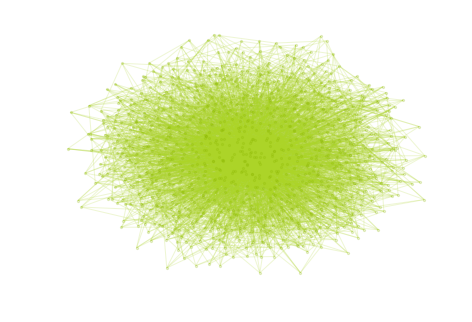

In [22]:
nx.draw(C, node_size=5, with_labels=0, alpha=0.2, node_color="#8cb700", edge_color="#acd428")

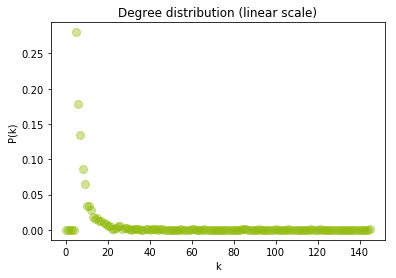

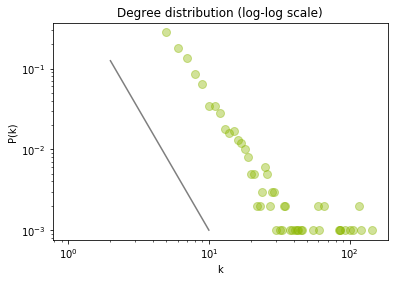

In [115]:
k_distrib(graph=C,colour='#8cb700',alpha=.4)
k_distrib(graph=C,colour='#8cb700', scale='log',alpha=.4, expct_lo=2, expct_hi=11, expct_const=1)

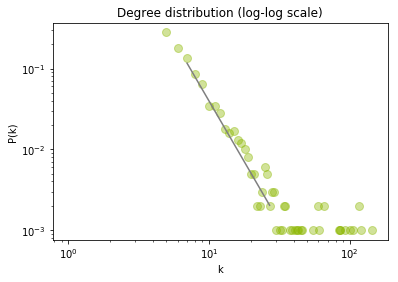

In [127]:
k_distrib(graph=C,colour='#8cb700', scale='log',alpha=.4, expct_lo=7, expct_hi=28, expct_const=40)

In [4]:
D = nx.Graph()
D.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])

In [5]:
D.add_edges_from([(0, 1), (0, 2), (0, 1313), (0, 1156), (0, 129), (0, 1672), (0, 972), (0, 1675), (0, 12), (0, 205), (0, 270), (0, 13), (0, 17), (0, 334), (0, 535), (0, 612), (0, 90), (0, 527), (0, 1063), (0, 218), (0, 991), (0, 1312), (0, 801), (0, 77), (0, 813), (0, 294), (0, 81), (0, 360), (0, 551), (0, 234), (0, 43), (0, 812), (0, 562), (0, 1775), (0, 178), (0, 1395), (0, 1589), (0, 1740), (0, 754), (0, 59), (0, 1359), (0, 1002), (0, 725), (1, 1540), (1, 314), (1, 924), (1, 410), (1, 734), (1, 591), (2, 149), (2, 1154), (2, 3), (2, 517), (2, 6), (2, 907), (2, 14), (2, 271), (2, 16), (2, 687), (2, 1427), (2, 21), (2, 1561), (2, 154), (2, 155), (2, 26), (2, 1010), (2, 1693), (2, 673), (2, 879), (2, 1700), (2, 165), (2, 679), (2, 40), (2, 554), (2, 199), (2, 557), (2, 922), (2, 157), (2, 48), (2, 308), (2, 309), (2, 560), (2, 699), (2, 61), (2, 321), (2, 962), (2, 71), (2, 840), (2, 841), (2, 1994), (2, 45), (2, 465), (2, 82), (2, 365), (2, 216), (2, 857), (2, 399), (2, 480), (2, 144), (2, 1979), (2, 1636), (2, 1260), (2, 109), (2, 353), (2, 1248), (2, 882), (2, 116), (2, 245), (2, 1142), (2, 503), (2, 248), (2, 122), (2, 253), (2, 661), (3, 257), (3, 299), (3, 4), (3, 5), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 525), (3, 786), (3, 19), (3, 999), (3, 22), (3, 25), (3, 393), (3, 36), (3, 37), (3, 38), (3, 553), (3, 274), (3, 811), (3, 44), (3, 558), (3, 905), (3, 563), (3, 513), (3, 777), (3, 63), (3, 1089), (3, 1346), (3, 68), (3, 585), (3, 843), (3, 269), (3, 80), (3, 1361), (3, 338), (3, 1107), (3, 1113), (3, 93), (3, 96), (3, 865), (3, 1127), (3, 105), (3, 107), (3, 1133), (3, 368), (3, 1137), (3, 643), (3, 118), (3, 375), (3, 771), (3, 916), (3, 635), (3, 638), (3, 895), (3, 1409), (3, 386), (3, 131), (3, 647), (3, 137), (3, 909), (3, 1425), (3, 146), (3, 404), (3, 407), (3, 1795), (3, 665), (3, 158), (3, 1872), (3, 1641), (3, 936), (3, 1962), (3, 1715), (3, 670), (3, 950), (3, 183), (3, 1738), (3, 1473), (3, 194), (3, 202), (3, 715), (3, 976), (3, 1490), (3, 724), (3, 1238), (3, 847), (3, 479), (3, 1488), (3, 485), (3, 742), (3, 487), (3, 1218), (3, 747), (3, 1874), (3, 1518), (3, 775), (3, 1875), (3, 251), (3, 1277), (3, 1022), (3, 255), (4, 275), (4, 41), (5, 289), (5, 1410), (5, 167), (5, 119), (5, 524), (6, 864), (6, 35), (6, 903), (6, 347), (6, 18), (6, 66), (6, 159), (8, 1465), (8, 717), (8, 870), (8, 471), (9, 320), (9, 516), (9, 1734), (9, 175), (9, 56), (9, 1460), (9, 1013), (9, 1622), (9, 23), (9, 408), (9, 1112), (9, 1647), (9, 351), (10, 1236), (10, 67), (10, 580), (10, 467), (11, 64), (11, 1953), (11, 134), (11, 434), (11, 15), (11, 1243), (11, 50), (11, 979), (11, 20), (11, 246), (11, 1849), (11, 24), (11, 121), (11, 1167), (11, 1293), (11, 797), (11, 31), (12, 65), (12, 1660), (12, 1109), (13, 450), (13, 772), (13, 197), (13, 1349), (13, 329), (13, 462), (13, 593), (13, 342), (13, 668), (13, 442), (13, 542), (13, 863), (13, 1585), (13, 682), (13, 1646), (13, 1327), (13, 240), (13, 645), (13, 1138), (13, 51), (13, 884), (13, 58), (13, 1531), (13, 574), (14, 32), (14, 187), (14, 133), (14, 1415), (14, 649), (14, 589), (14, 785), (14, 54), (14, 921), (14, 443), (14, 1884), (14, 926), (14, 293), (15, 1569), (15, 98), (15, 325), (15, 495), (15, 304), (15, 1042), (15, 885), (15, 630), (15, 1207), (15, 378), (15, 1534), (15, 213), (16, 106), (16, 1213), (17, 515), (17, 182), (17, 73), (17, 79), (17, 555), (17, 143), (17, 1215), (17, 207), (17, 112), (17, 561), (17, 1974), (17, 502), (17, 1545), (17, 1626), (17, 27), (17, 1450), (17, 30), (17, 607), (18, 225), (18, 101), (18, 70), (18, 231), (18, 1001), (18, 1707), (18, 1676), (18, 366), (18, 1135), (18, 400), (18, 1262), (18, 1180), (18, 85), (18, 568), (18, 1648), (18, 28), (18, 1596), (20, 896), (20, 354), (20, 102), (20, 1000), (20, 169), (20, 397), (20, 1006), (20, 301), (20, 1896), (20, 1495), (20, 185), (20, 1263), (20, 956), (20, 478), (20, 383), (22, 52), (22, 195), (22, 1369), (22, 233), (22, 1436), (22, 381), (23, 567), (24, 164), (24, 933), (24, 550), (24, 423), (24, 235), (24, 1326), (24, 765), (24, 177), (24, 1426), (24, 659), (24, 285), (24, 62), (25, 1779), (25, 324), (25, 814), (25, 1302), (25, 1383), (25, 168), (25, 170), (25, 1642), (25, 29), (25, 254), (26, 1824), (26, 1267), (27, 34), (27, 227), (27, 1285), (28, 296), (28, 69), (28, 1925), (30, 448), (30, 768), (30, 578), (30, 774), (30, 621), (30, 47), (30, 114), (30, 1523), (30, 953), (30, 536), (30, 537), (30, 474), (30, 315), (30, 1150), (31, 1130), (31, 260), (32, 33), (32, 132), (32, 405), (32, 1337), (32, 552), (32, 489), (32, 42), (32, 1252), (32, 364), (32, 1841), (33, 984), (33, 618), (34, 736), (34, 433), (34, 53), (34, 1270), (34, 39), (34, 123), (34, 1469), (34, 783), (35, 322), (35, 1527), (36, 994), (36, 1324), (36, 1058), (36, 46), (37, 367), (37, 343), (37, 87), (38, 162), (38, 581), (38, 967), (38, 968), (38, 394), (38, 239), (38, 946), (38, 339), (38, 376), (38, 1817), (38, 859), (38, 862), (40, 259), (40, 179), (40, 1122), (40, 1993), (40, 459), (40, 60), (40, 923), (40, 1422), (41, 208), (41, 49), (41, 226), (41, 371), (41, 135), (41, 1684), (41, 835), (41, 1303), (41, 915), (42, 403), (42, 1428), (42, 677), (43, 497), (43, 1088), (44, 128), (44, 100), (44, 1160), (44, 548), (44, 413), (44, 335), (45, 640), (45, 261), (45, 520), (45, 1291), (45, 141), (45, 1149), (45, 1043), (45, 1748), (45, 1367), (45, 793), (45, 348), (45, 97), (45, 290), (45, 310), (45, 681), (45, 362), (45, 694), (45, 1776), (45, 1650), (45, 1462), (45, 1341), (46, 1216), (46, 628), (46, 1554), (46, 1253), (46, 1073), (46, 1528), (46, 57), (46, 1851), (46, 1246), (47, 1040), (47, 1219), (47, 136), (47, 172), (47, 428), (47, 1136), (47, 720), (47, 115), (47, 55), (47, 88), (47, 1564), (47, 252), (47, 947), (47, 382), (48, 196), (49, 160), (49, 993), (49, 1859), (49, 708), (49, 150), (49, 1024), (49, 1494), (49, 1227), (49, 748), (49, 108), (49, 84), (49, 1045), (49, 86), (49, 1625), (49, 602), (49, 287), (49, 511), (50, 1437), (52, 1731), (52, 1652), (52, 1031), (52, 1096), (52, 1783), (52, 1230), (52, 655), (52, 337), (52, 1810), (52, 1237), (52, 983), (52, 344), (52, 730), (52, 719), (52, 1311), (52, 871), (52, 1385), (52, 1258), (52, 620), (52, 1454), (52, 244), (52, 181), (52, 887), (52, 313), (52, 415), (52, 1834), (52, 117), (53, 78), (54, 1607), (55, 893), (55, 425), (55, 440), (55, 265), (55, 1485), (55, 444), (55, 573), (56, 387), (56, 247), (56, 746), (56, 91), (56, 268), (56, 1501), (57, 1624), (57, 436), (57, 1269), (57, 1735), (57, 856), (57, 1069), (57, 95), (58, 1555), (60, 966), (60, 741), (60, 94), (61, 352), (61, 449), (61, 803), (61, 452), (61, 104), (61, 1610), (61, 669), (61, 1091), (61, 470), (61, 215), (61, 1241), (61, 731), (61, 477), (62, 1804), (62, 326), (63, 1174), (63, 1095), (63, 72), (63, 1972), (63, 458), (63, 76), (63, 1232), (63, 914), (63, 579), (63, 598), (63, 472), (63, 539), (63, 284), (63, 1247), (63, 163), (63, 1188), (63, 1713), (63, 412), (63, 171), (63, 110), (63, 111), (63, 1139), (63, 83), (63, 692), (63, 566), (63, 1844), (63, 890), (63, 763), (63, 126), (64, 897), (64, 886), (64, 1249), (64, 75), (64, 349), (65, 212), (65, 222), (65, 1463), (67, 1651), (67, 690), (67, 931), (67, 740), (67, 1014), (67, 873), (67, 1439), (69, 1192), (69, 1360), (70, 147), (70, 468), (70, 437), (70, 345), (70, 74), (70, 92), (70, 970), (70, 174), (70, 1231), (73, 416), (73, 1316), (73, 1413), (73, 358), (73, 939), (73, 396), (73, 911), (73, 211), (73, 340), (73, 341), (73, 438), (73, 151), (74, 1314), (74, 500), (74, 120), (74, 281), (74, 875), (74, 1132), (74, 831), (75, 912), (76, 1986), (76, 1570), (76, 388), (76, 758), (76, 328), (76, 188), (76, 876), (76, 429), (76, 1484), (76, 461), (76, 432), (76, 1128), (76, 1234), (76, 1966), (76, 333), (76, 280), (76, 671), (76, 380), (76, 190), (77, 706), (77, 723), (77, 1796), (77, 153), (77, 266), (77, 667), (77, 1932), (79, 385), (79, 1235), (79, 506), (79, 103), (79, 861), (80, 1516), (80, 636), (80, 1445), (81, 1681), (82, 609), (82, 1492), (82, 904), (82, 619), (82, 718), (84, 431), (84, 89), (86, 1140), (86, 130), (86, 869), (86, 1606), (86, 204), (86, 1547), (86, 300), (86, 148), (86, 697), (86, 441), (86, 220), (86, 1029), (88, 198), (88, 1065), (88, 201), (88, 219), (88, 492), (88, 1614), (90, 496), (90, 1765), (90, 704), (90, 1053), (90, 223), (91, 1028), (91, 138), (91, 1259), (91, 1071), (91, 307), (91, 1332), (91, 1654), (91, 919), (91, 639), (91, 221), (91, 767), (93, 278), (94, 460), (95, 818), (95, 180), (95, 297), (95, 424), (95, 250), (95, 860), (95, 749), (96, 99), (96, 217), (96, 1907), (96, 236), (96, 1391), (98, 559), (98, 127), (98, 139), (98, 1500), (99, 756), (100, 1268), (101, 241), (101, 1239), (101, 1416), (101, 1499), (101, 350), (102, 688), (102, 1616), (102, 291), (102, 486), (102, 1543), (102, 1912), (102, 140), (104, 361), (104, 653), (105, 124), (105, 395), (105, 391), (106, 1433), (106, 298), (107, 776), (107, 1443), (107, 279), (108, 1798), (108, 1702), (108, 1201), (108, 1418), (108, 359), (108, 1965), (108, 1935), (109, 145), (109, 238), (109, 1049), (110, 113), (111, 224), (111, 191), (111, 959), (111, 1158), (112, 1100), (112, 1766), (112, 958), (114, 674), (114, 1011), (114, 156), (115, 1980), (117, 384), (117, 675), (117, 597), (117, 166), (117, 203), (117, 125), (117, 1245), (118, 336), (119, 214), (119, 943), (120, 1347), (120, 1732), (120, 230), (120, 1927), (120, 745), (120, 272), (120, 209), (120, 1411), (120, 596), (120, 789), (120, 1880), (121, 1964), (122, 1146), (122, 142), (123, 1289), (123, 1743), (126, 880), (127, 152), (127, 1228), (127, 1373), (127, 390), (128, 512), (128, 1757), (128, 1203), (128, 1566), (128, 606), (128, 1961), (128, 1386), (128, 173), (128, 206), (128, 445), (129, 576), (129, 658), (129, 1714), (129, 186), (129, 683), (129, 906), (130, 262), (131, 1056), (131, 1989), (131, 1855), (134, 605), (136, 192), (136, 369), (136, 538), (136, 960), (137, 1173), (140, 1977), (140, 1550), (140, 302), (142, 377), (142, 363), (142, 662), (142, 1643), (146, 1162), (146, 949), (146, 963), (146, 1199), (147, 1618), (147, 1358), (147, 807), (148, 228), (148, 453), (148, 456), (148, 660), (148, 1940), (148, 1148), (148, 614), (148, 1629), (148, 319), (149, 1609), (149, 330), (150, 762), (150, 331), (150, 1635), (150, 1375), (152, 1057), (152, 964), (152, 1125), (152, 1161), (152, 1493), (152, 427), (152, 1036), (152, 463), (152, 1329), (152, 564), (152, 981), (152, 796), (154, 1119), (155, 161), (155, 627), (155, 406), (155, 1697), (155, 1753), (155, 237), (155, 1586), (157, 176), (157, 987), (157, 1938), (157, 311), (158, 232), (158, 1388), (158, 1557), (160, 1328), (160, 642), (160, 1052), (161, 1771), (161, 189), (161, 877), (162, 210), (162, 1419), (162, 1412), (162, 258), (163, 1187), (163, 965), (164, 273), (164, 1083), (164, 357), (164, 701), (165, 193), (165, 540), (165, 732), (166, 1575), (167, 1758), (168, 800), (168, 616), (168, 402), (168, 373), (168, 521), (168, 184), (168, 1397), (168, 1163), (168, 1887), (168, 447), (171, 401), (171, 332), (172, 327), (172, 809), (172, 1322), (172, 1975), (172, 316), (172, 1997), (173, 1041), (174, 1256), (177, 1290), (177, 982), (177, 1903), (178, 698), (180, 1362), (180, 604), (183, 200), (184, 243), (185, 282), (185, 546), (186, 788), (186, 1806), (187, 1209), (187, 858), (188, 894), (189, 1101), (189, 790), (189, 590), (189, 529), (190, 242), (190, 1005), (193, 1687), (197, 1682), (197, 1917), (197, 1653), (197, 1271), (197, 1591), (197, 650), (197, 571), (197, 1881), (197, 543), (198, 1055), (203, 1577), (203, 306), (203, 1195), (203, 1969), (204, 1744), (204, 482), (204, 838), (204, 709), (205, 849), (205, 1479), (205, 1165), (205, 263), (206, 523), (206, 1926), (207, 1066), (207, 587), (207, 1894), (207, 705), (210, 1755), (210, 1331), (210, 595), (210, 286), (212, 684), (215, 1084), (215, 229), (217, 804), (217, 1582), (218, 1987), (219, 421), (221, 1784), (222, 948), (223, 608), (223, 1008), (223, 1026), (223, 422), (223, 1072), (223, 632), (223, 1720), (223, 1250), (225, 1790), (225, 1487), (226, 1951), (227, 1315), (227, 997), (227, 454), (227, 1723), (227, 1772), (227, 493), (227, 1998), (227, 249), (227, 760), (227, 473), (227, 1082), (227, 1885), (229, 312), (229, 1202), (229, 935), (232, 1251), (232, 1116), (232, 629), (233, 1308), (233, 625), (233, 1858), (233, 372), (234, 264), (234, 1762), (234, 678), (234, 823), (235, 1807), (236, 744), (236, 866), (237, 1552), (237, 738), (237, 820), (237, 1559), (239, 901), (242, 544), (242, 1726), (242, 317), (242, 1661), (243, 346), (243, 267), (243, 1254), (244, 430), (247, 504), (247, 850), (247, 851), (247, 356), (247, 277), (247, 1916), (247, 733), (247, 318), (248, 323), (248, 794), (248, 295), (249, 256), (249, 464), (249, 868), (249, 1366), (249, 1551), (250, 417), (250, 1747), (250, 1831), (252, 519), (252, 1892), (254, 1424), (254, 545), (254, 276), (254, 1377), (254, 522), (254, 541), (255, 283), (255, 952), (255, 1380), (258, 792), (261, 611), (261, 651), (262, 1402), (262, 1670), (263, 986), (263, 1403), (263, 892), (263, 374), (265, 531), (265, 1392), (265, 303), (268, 1376), (268, 370), (270, 355), (270, 292), (270, 389), (270, 787), (270, 411), (270, 1229), (271, 588), (271, 1118), (272, 666), (272, 1102), (272, 398), (272, 1949), (273, 288), (274, 1939), (274, 1787), (275, 1044), (275, 773), (276, 1196), (276, 1549), (277, 1368), (278, 1282), (278, 845), (285, 641), (285, 929), (285, 799), (286, 305), (286, 955), (286, 844), (286, 1171), (288, 498), (289, 728), (289, 710), (290, 1120), (290, 1342), (291, 392), (291, 686), (293, 592), (296, 1048), (296, 1640), (296, 1595), (296, 414), (298, 918), (299, 1649), (300, 1177), (300, 1273), (301, 689), (301, 1685), (303, 1233), (304, 1077), (307, 770), (310, 1914), (310, 1574), (311, 1183), (312, 1408), (312, 1266), (312, 499), (312, 996), (312, 1015), (312, 680), (312, 1348), (312, 1883), (312, 1181), (314, 1768), (316, 913), (316, 837), (317, 712), (317, 1736), (317, 1612), (317, 634), (320, 475), (320, 1923), (320, 853), (321, 1911), (322, 613), (322, 526), (325, 637), (329, 617), (329, 1474), (329, 1857), (332, 1862), (332, 1221), (332, 1178), (332, 409), (332, 570), (332, 379), (332, 1323), (332, 419), (332, 1151), (333, 832), (333, 833), (333, 1963), (336, 1922), (336, 1733), (336, 426), (336, 1244), (336, 1098), (337, 1081), (337, 1257), (341, 928), (342, 700), (342, 586), (342, 1004), (342, 1777), (342, 883), (342, 469), (342, 1147), (342, 1372), (342, 509), (342, 1406), (342, 565), (344, 1677), (348, 826), (348, 1325), (349, 938), (350, 848), (350, 490), (350, 810), (350, 830), (351, 1298), (351, 881), (351, 599), (353, 1129), (353, 726), (353, 623), (355, 1952), (355, 1061), (355, 1517), (357, 481), (358, 1842), (358, 1211), (359, 727), (360, 505), (360, 1039), (362, 1509), (362, 663), (362, 1867), (362, 925), (362, 1166), (363, 1689), (363, 1477), (364, 1186), (365, 1928), (365, 1639), (365, 1508), (365, 751), (367, 1603), (367, 1813), (367, 1526), (367, 711), (367, 1467), (367, 1756), (367, 1710), (367, 1631), (369, 1481), (369, 1948), (371, 778), (372, 1942), (373, 1210), (373, 839), (374, 672), (375, 1902), (376, 824), (376, 1169), (376, 1644), (376, 446), (377, 508), (377, 1310), (379, 435), (379, 764), (379, 696), (379, 457), (379, 867), (379, 1955), (379, 1134), (379, 572), (380, 1194), (381, 532), (382, 1352), (382, 854), (383, 533), (384, 1288), (384, 575), (384, 501), (385, 1701), (385, 1123), (385, 1515), (387, 418), (387, 1449), (387, 476), (387, 1021), (387, 798), (388, 657), (388, 1822), (388, 819), (388, 1572), (388, 549), (388, 439), (388, 1054), (389, 1145), (389, 1378), (389, 646), (390, 624), (390, 1594), (391, 1093), (391, 583), (393, 1472), (393, 1297), (393, 757), (393, 822), (393, 455), (393, 1590), (393, 750), (394, 828), (396, 600), (396, 1763), (396, 1085), (396, 631), (397, 514), (397, 676), (397, 1529), (397, 488), (397, 1364), (397, 735), (399, 534), (400, 1686), (401, 739), (402, 1491), (403, 1981), (404, 577), (404, 491), (405, 1176), (405, 990), (405, 654), (405, 1799), (407, 1018), (407, 1530), (409, 1704), (410, 518), (411, 1818), (412, 1464), (412, 1882), (412, 795), (412, 1447), (414, 507), (415, 656), (415, 601), (415, 1803), (416, 1571), (416, 420), (418, 648), (418, 1131), (418, 1611), (418, 703), (419, 753), (419, 1786), (419, 974), (420, 1417), (420, 1717), (420, 1999), (421, 1152), (421, 1496), (421, 1106), (421, 1480), (421, 1674), (422, 466), (422, 644), (423, 483), (423, 1791), (432, 1567), (432, 685), (432, 1751), (432, 693), (437, 1680), (440, 729), (440, 451), (440, 494), (442, 582), (443, 1272), (443, 977), (443, 1864), (446, 1034), (446, 1374), (447, 827), (448, 1524), (449, 528), (451, 510), (453, 1087), (454, 1573), (454, 1486), (456, 1168), (456, 1794), (456, 622), (459, 930), (459, 484), (461, 556), (461, 743), (465, 547), (467, 908), (467, 1338), (467, 1478), (467, 1695), (468, 1016), (468, 1240), (468, 714), (471, 1099), (474, 1837), (475, 1114), (475, 691), (475, 766), (475, 759), (476, 1476), (476, 1754), (476, 899), (477, 917), (478, 569), (478, 1307), (479, 530), (479, 610), (479, 782), (479, 755), (485, 1027), (487, 874), (488, 1583), (490, 1281), (490, 1319), (491, 1344), (491, 1668), (492, 1532), (493, 1434), (493, 1934), (493, 855), (494, 664), (494, 1645), (498, 780), (498, 1287), (499, 1170), (502, 834), (502, 1718), (503, 626), (503, 957), (504, 1890), (504, 1339), (505, 1752), (505, 995), (505, 1396), (505, 1126), (506, 1815), (508, 891), (508, 1309), (508, 1662), (517, 1003), (518, 1808), (518, 1721), (518, 1638), (518, 1350), (519, 1025), (519, 1023), (520, 1261), (522, 1097), (522, 1475), (523, 1354), (527, 1592), (529, 784), (530, 584), (530, 842), (530, 1179), (530, 940), (534, 1456), (534, 1305), (534, 829), (538, 1060), (540, 1556), (540, 1278), (543, 1827), (544, 1510), (544, 1671), (544, 1050), (544, 978), (544, 1470), (548, 898), (548, 1602), (550, 1108), (553, 1930), (553, 1828), (553, 927), (554, 1033), (555, 1012), (555, 910), (556, 702), (557, 603), (557, 1046), (557, 1143), (561, 1769), (563, 920), (563, 1185), (563, 594), (566, 1781), (568, 1541), (569, 1159), (571, 1665), (571, 633), (571, 1604), (571, 1455), (575, 1588), (575, 1286), (575, 1086), (576, 1384), (576, 652), (576, 1504), (576, 615), (577, 1153), (577, 1075), (580, 1461), (580, 1919), (581, 944), (581, 1621), (584, 900), (584, 1893), (584, 1079), (585, 1092), (593, 1379), (593, 716), (595, 1920), (597, 1664), (598, 1825), (599, 1217), (599, 707), (599, 934), (599, 1094), (599, 1601), (607, 1692), (608, 1279), (608, 1292), (611, 1062), (612, 1423), (615, 808), (622, 1793), (622, 1906), (622, 695), (622, 1801), (622, 1389), (624, 941), (626, 1356), (631, 1568), (631, 1519), (635, 737), (637, 821), (639, 1539), (639, 1489), (639, 1820), (640, 1889), (640, 815), (645, 722), (646, 942), (650, 1525), (651, 761), (655, 713), (656, 1888), (658, 1296), (658, 836), (658, 1513), (660, 721), (660, 1959), (662, 1206), (663, 816), (663, 1164), (666, 1833), (666, 1669), (666, 1398), (667, 975), (673, 1394), (674, 1105), (674, 1879), (674, 1090), (674, 1357), (675, 1051), (677, 1304), (677, 937), (677, 1381), (678, 1224), (680, 1947), (680, 1542), (681, 1742), (689, 1471), (690, 1584), (690, 825), (690, 1909), (693, 1421), (694, 1074), (696, 889), (697, 802), (697, 1498), (698, 1104), (698, 1749), (698, 1110), (699, 1401), (701, 1345), (701, 971), (702, 969), (702, 1709), (703, 1634), (704, 988), (705, 1336), (708, 888), (710, 1400), (710, 1982), (715, 769), (717, 1553), (723, 1619), (723, 1958), (728, 752), (728, 805), (728, 1918), (730, 1184), (734, 1225), (734, 1193), (735, 1067), (737, 1335), (740, 1936), (740, 985), (743, 1816), (743, 1599), (745, 872), (745, 1688), (745, 1035), (746, 951), (748, 1343), (754, 1124), (754, 902), (755, 1353), (755, 1562), (755, 1141), (755, 1605), (756, 1064), (757, 1741), (758, 1759), (758, 1511), (759, 1020), (759, 878), (761, 1929), (766, 1466), (766, 1189), (767, 779), (767, 1197), (768, 1080), (770, 781), (772, 1691), (772, 1068), (773, 954), (773, 980), (774, 1265), (778, 1399), (780, 1845), (781, 791), (783, 961), (785, 1255), (786, 1482), (787, 846), (793, 1009), (793, 1420), (797, 1355), (798, 1300), (800, 1854), (800, 806), (801, 1544), (801, 1076), (801, 1190), (802, 1017), (803, 817), (803, 1774), (811, 1382), (812, 1363), (812, 1155), (812, 1620), (812, 1711), (813, 945), (813, 1208), (813, 1905), (817, 1944), (817, 1387), (817, 932), (818, 1242), (818, 1212), (825, 1719), (827, 1459), (831, 1497), (831, 1954), (833, 1222), (834, 852), (839, 1991), (840, 1505), (840, 1115), (845, 1690), (846, 1452), (847, 1739), (847, 1580), (847, 1414), (848, 1117), (850, 1856), (850, 1950), (850, 1294), (855, 1724), (860, 1968), (861, 1792), (865, 1705), (868, 1405), (868, 1295), (870, 989), (873, 1390), (876, 1760), (876, 1666), (878, 1446), (880, 1204), (883, 1440), (886, 1393), (888, 1019), (894, 1264), (894, 1453), (894, 1767), (898, 1728), (900, 1712), (901, 1904), (901, 1435), (901, 1699), (907, 1725), (908, 1502), (915, 1038), (915, 1615), (918, 1915), (919, 1429), (919, 1995), (929, 1871), (937, 1318), (938, 1458), (939, 1898), (939, 1895), (948, 998), (950, 1659), (954, 1600), (954, 1537), (954, 1811), (954, 1976), (954, 1144), (954, 1832), (954, 1103), (955, 1121), (956, 1924), (958, 1157), (959, 1899), (960, 992), (962, 1191), (963, 1030), (965, 1565), (965, 1838), (966, 1404), (970, 973), (975, 1370), (977, 1200), (984, 1070), (987, 1868), (990, 1223), (992, 1330), (992, 1340), (997, 1032), (997, 1007), (999, 1536), (999, 1059), (999, 1578), (999, 1220), (1001, 1441), (1002, 1683), (1003, 1431), (1005, 1037), (1012, 1613), (1018, 1866), (1021, 1276), (1025, 1299), (1028, 1514), (1028, 1830), (1029, 1317), (1031, 1047), (1035, 1280), (1043, 1847), (1043, 1407), (1044, 1451), (1044, 1967), (1047, 1078), (1049, 1913), (1049, 1205), (1052, 1761), (1052, 1587), (1053, 1275), (1053, 1198), (1055, 1656), (1057, 1351), (1060, 1869), (1063, 1706), (1064, 1442), (1066, 1597), (1067, 1657), (1068, 1172), (1068, 1780), (1071, 1870), (1071, 1829), (1071, 1750), (1072, 1538), (1083, 1283), (1084, 1608), (1084, 1921), (1085, 1956), (1090, 1563), (1091, 1226), (1093, 1333), (1097, 1745), (1097, 1111), (1103, 1503), (1103, 1175), (1110, 1985), (1116, 1984), (1123, 1182), (1132, 1506), (1132, 1667), (1132, 1593), (1132, 1628), (1132, 1789), (1136, 1673), (1136, 1633), (1142, 1520), (1142, 1321), (1142, 1992), (1153, 1886), (1153, 1814), (1163, 1457), (1168, 1214), (1181, 1284), (1181, 1438), (1181, 1679), (1182, 1558), (1183, 1306), (1189, 1931), (1199, 1301), (1210, 1432), (1212, 1839), (1216, 1274), (1231, 1320), (1233, 1897), (1238, 1960), (1239, 1957), (1256, 1703), (1256, 1430), (1256, 1535), (1257, 1365), (1261, 1522), (1266, 1334), (1283, 1521), (1289, 1800), (1290, 1937), (1292, 1865), (1303, 1579), (1304, 1637), (1308, 1548), (1320, 1581), (1328, 1978), (1354, 1627), (1354, 1778), (1359, 1698), (1359, 1371), (1363, 1468), (1367, 1861), (1370, 1632), (1371, 1785), (1372, 1512), (1373, 1840), (1378, 1730), (1378, 1727), (1386, 1846), (1387, 1576), (1400, 1877), (1405, 1560), (1406, 1507), (1416, 1448), (1424, 1696), (1424, 1802), (1424, 1444), (1436, 1797), (1441, 1716), (1441, 1729), (1444, 1623), (1445, 1533), (1453, 1809), (1453, 1843), (1455, 1655), (1459, 1483), (1461, 1788), (1461, 1852), (1463, 1878), (1465, 1746), (1471, 1722), (1476, 1598), (1477, 1908), (1479, 1860), (1480, 1630), (1493, 1658), (1495, 1873), (1505, 1678), (1513, 1836), (1516, 1988), (1518, 1770), (1521, 1617), (1522, 1901), (1523, 1773), (1527, 1546), (1534, 1826), (1534, 1805), (1547, 1971), (1548, 1737), (1551, 1990), (1557, 1891), (1576, 1823), (1587, 1812), (1588, 1945), (1603, 1943), (1603, 1973), (1604, 1853), (1606, 1848), (1608, 1863), (1622, 1782), (1632, 1970), (1639, 1708), (1646, 1996), (1652, 1663), (1654, 1694), (1661, 1946), (1664, 1850), (1682, 1876), (1707, 1819), (1717, 1821), (1728, 1835), (1753, 1764), (1758, 1933), (1759, 1900), (1877, 1941), (1894, 1910), (1919, 1983)])

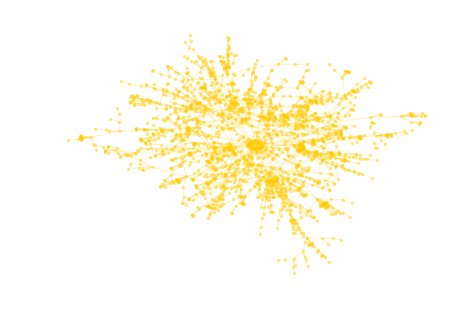

In [6]:
nx.draw(D, node_size=5, with_labels=0, alpha=0.4, node_color="#ffcc00", edge_color="#ffde58")

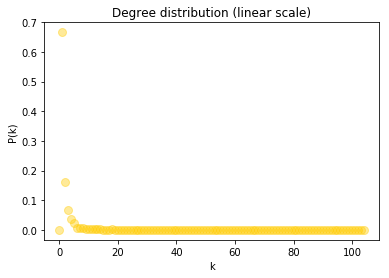

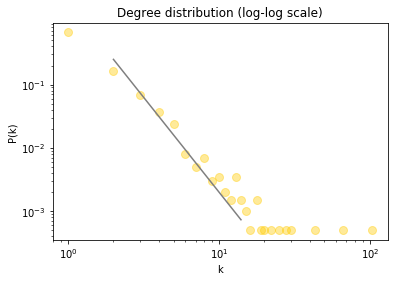

In [93]:
k_distrib(graph=D,colour='#ffcc00',alpha=.4)
k_distrib(graph=D,colour='#ffcc00', scale='log',alpha=.4, expct_lo=2, expct_hi=15, expct_const=2)

In [36]:
E = nx.Graph()
E.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
E.add_edges_from([(0, 96), (0, 1), (0, 2), (0, 5), (0, 40), (0, 45), (0, 46), (0, 80), (0, 8), (0, 83), (0, 72), (0, 90), (0, 28), (1, 64), (1, 2), (1, 3), (1, 4), (1, 11), (1, 34), (1, 19), (1, 20), (1, 24), (1, 52), (1, 59), (1, 67), (1, 31), (2, 3), (2, 4), (2, 69), (2, 6), (2, 7), (2, 9), (2, 12), (2, 13), (2, 14), (2, 15), (2, 17), (2, 19), (2, 24), (2, 26), (2, 32), (2, 35), (2, 36), (2, 65), (2, 41), (2, 71), (2, 44), (2, 48), (2, 49), (2, 63), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 40), (3, 10), (3, 11), (3, 76), (3, 13), (3, 46), (3, 15), (3, 21), (3, 70), (3, 30), (4, 91), (4, 5), (4, 33), (4, 8), (4, 9), (4, 76), (4, 45), (4, 14), (4, 17), (4, 18), (4, 19), (4, 85), (4, 86), (4, 49), (4, 27), (4, 29), (5, 37), (5, 6), (5, 7), (5, 8), (5, 10), (5, 15), (5, 48), (5, 81), (5, 18), (5, 51), (5, 20), (5, 57), (5, 25), (5, 38), (5, 94), (6, 16), (6, 35), (6, 22), (6, 73), (6, 12), (6, 30), (7, 96), (7, 80), (7, 70), (7, 9), (7, 74), (7, 12), (7, 46), (7, 61), (7, 16), (7, 99), (7, 85), (7, 25), (7, 58), (7, 27), (7, 29), (7, 69), (8, 75), (8, 23), (8, 25), (8, 71), (8, 62), (8, 36), (9, 32), (9, 75), (9, 71), (9, 42), (9, 34), (9, 11), (9, 81), (9, 89), (9, 60), (9, 10), (9, 94), (10, 17), (10, 18), (10, 59), (10, 14), (11, 66), (11, 98), (11, 54), (11, 73), (11, 26), (11, 13), (11, 29), (12, 22), (12, 57), (12, 87), (12, 43), (13, 16), (13, 48), (13, 84), (13, 21), (13, 22), (13, 92), (13, 44), (13, 34), (14, 68), (15, 82), (15, 52), (15, 93), (16, 33), (16, 98), (16, 68), (16, 42), (16, 43), (16, 79), (16, 21), (16, 23), (16, 27), (17, 20), (17, 78), (17, 86), (17, 55), (17, 28), (17, 30), (18, 31), (19, 83), (19, 23), (19, 56), (20, 54), (21, 90), (22, 40), (22, 50), (22, 24), (22, 88), (22, 26), (22, 62), (23, 97), (23, 50), (23, 66), (23, 92), (23, 76), (23, 45), (24, 85), (25, 33), (25, 41), (25, 49), (25, 28), (25, 61), (26, 65), (26, 41), (26, 90), (26, 31), (27, 53), (27, 55), (27, 74), (28, 72), (29, 38), (29, 39), (29, 44), (30, 54), (31, 32), (31, 43), (32, 81), (32, 35), (32, 77), (33, 64), (33, 96), (33, 37), (33, 38), (33, 72), (33, 87), (33, 47), (33, 50), (33, 51), (33, 53), (33, 55), (33, 59), (33, 36), (34, 39), (34, 57), (34, 62), (35, 37), (35, 39), (36, 99), (36, 53), (36, 82), (37, 64), (37, 77), (38, 58), (38, 51), (38, 70), (38, 56), (38, 73), (38, 42), (38, 61), (42, 75), (42, 67), (43, 97), (43, 82), (43, 52), (43, 56), (43, 60), (43, 95), (43, 47), (44, 84), (45, 47), (46, 98), (47, 86), (47, 87), (47, 63), (49, 88), (49, 99), (51, 77), (54, 60), (55, 80), (55, 89), (56, 65), (56, 69), (56, 63), (57, 83), (57, 58), (57, 79), (58, 66), (60, 84), (60, 92), (60, 78), (62, 67), (65, 68), (65, 93), (69, 79), (70, 95), (72, 88), (73, 74), (74, 91), (75, 93), (75, 78), (76, 95), (77, 91), (81, 89), (86, 94), (94, 97)])

In [130]:
F = G

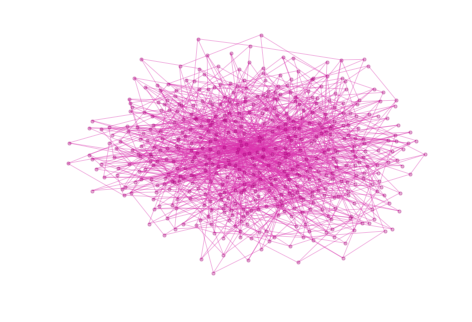

In [135]:
nx.draw(F, node_size=10, with_labels=0, alpha=0.3, node_color="#a70078", edge_color="#db33af")

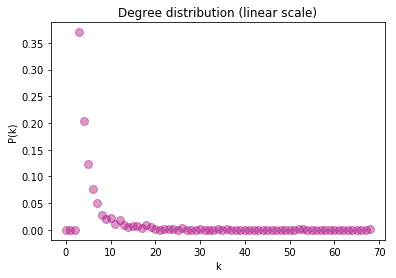

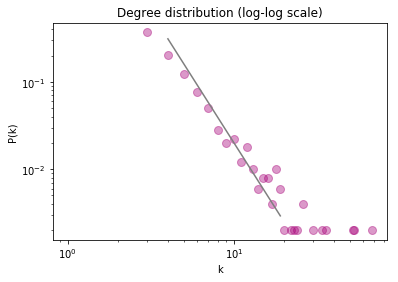

In [136]:
k_distrib(graph=F,colour='#a70078',alpha=.4)
k_distrib(graph=F,colour='#a70078', scale='log',alpha=.4, expct_lo=4, expct_hi=20, expct_const=20)